In [ ]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


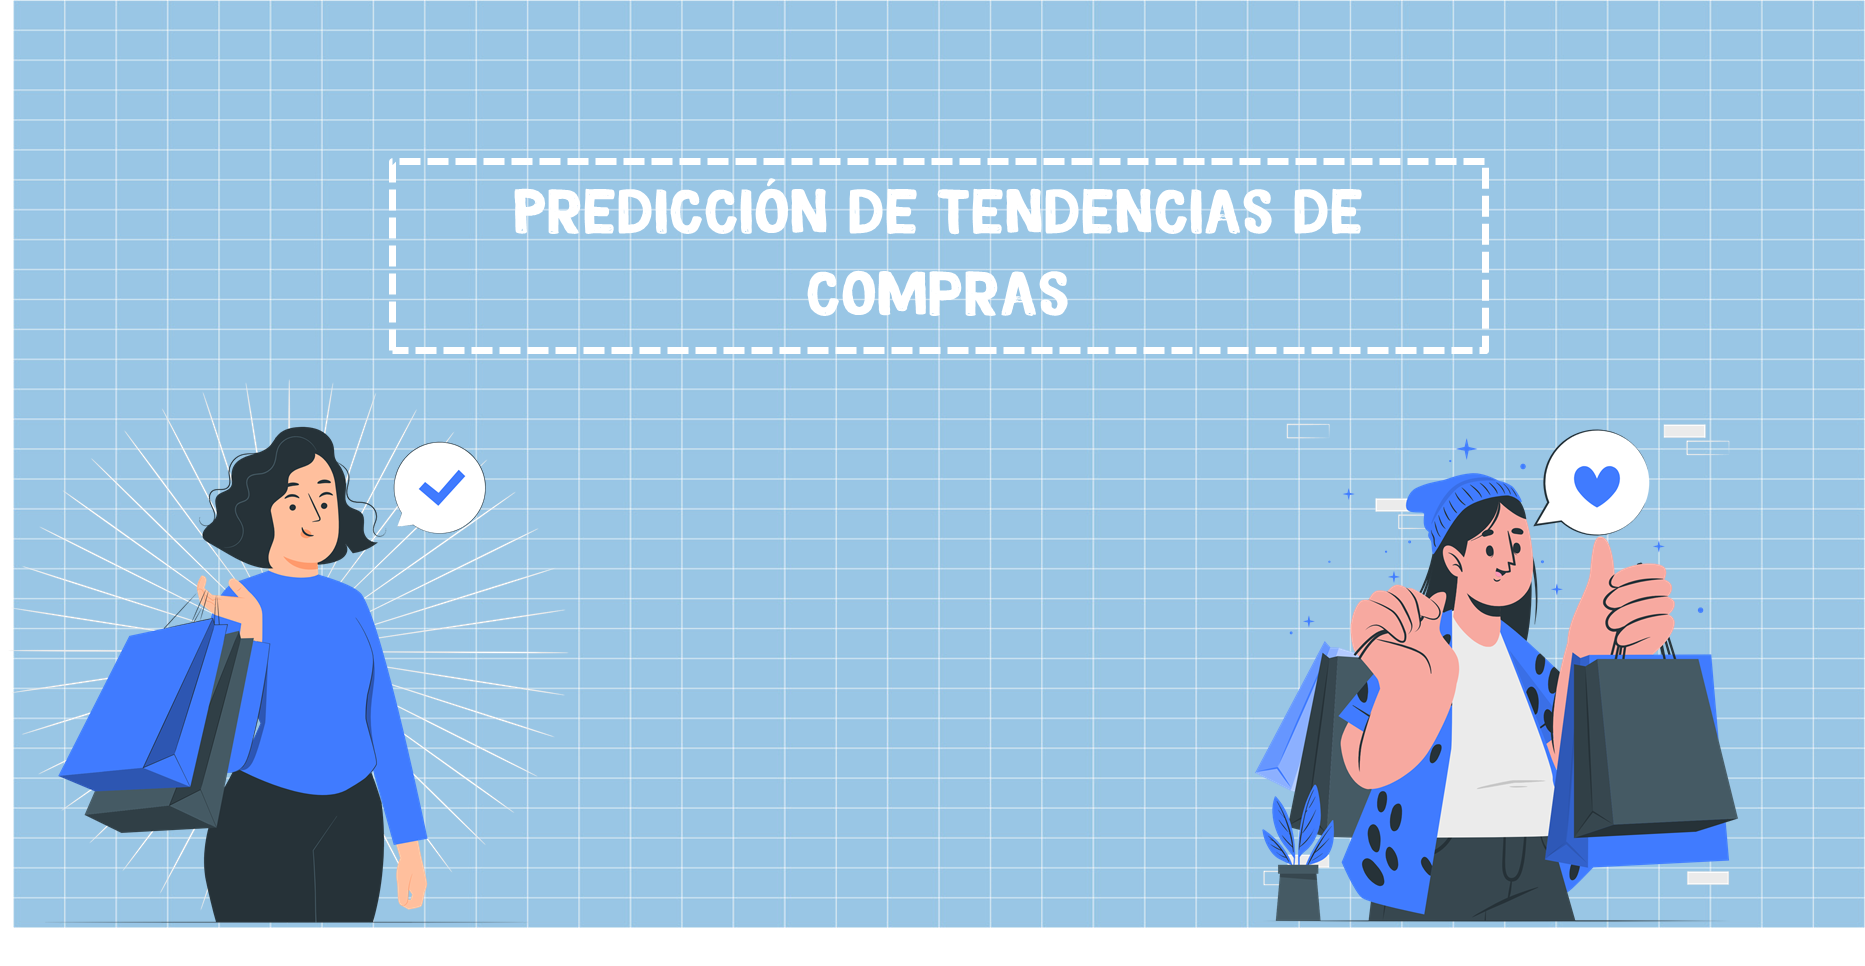

In [ ]:
from IPython.display import Image
Image("/content/titulo.png")

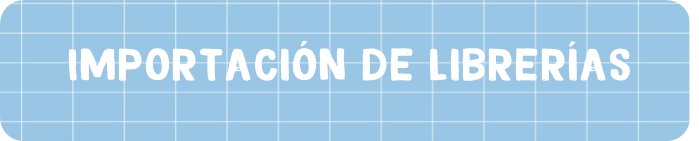

In [ ]:
Image("/content/librerias.png")

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, make_scorer, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVR, SVC
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
sns.set_theme()
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
from IPython.display import HTML
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
pd.__version__

'2.0.3'

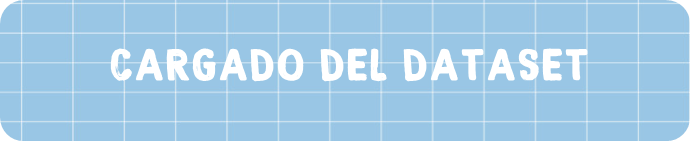

In [ ]:
Image("/content/dataset.png")

In [ ]:
!pip install gdown

import gdown

file_id = '1xsVTf6tj2hIUawj0u-43i5j_b3aY2fiF'
url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(url, 'data.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1xsVTf6tj2hIUawj0u-43i5j_b3aY2fiF
To: /content/data.csv
100%|██████████| 220k/220k [00:00<00:00, 57.8MB/s]


'data.csv'

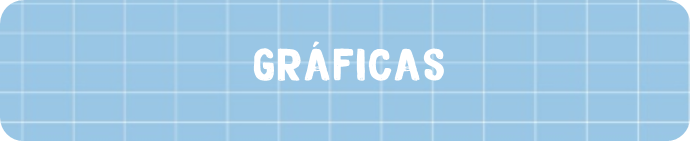

In [ ]:
Image("/content/graficas.png")

In [ ]:
df = pd.read_csv('data.csv', sep="\t")

# Uso de .shape y .columns

In [ ]:
print(df.columns, df.shape)
print("---------------- \n Tabla \n---------------")
df.head(10)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object') (2240, 29)
---------------- 
 Tabla 
---------------


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


#Uso de describe()

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Uso de info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Gráficas de datos númericos


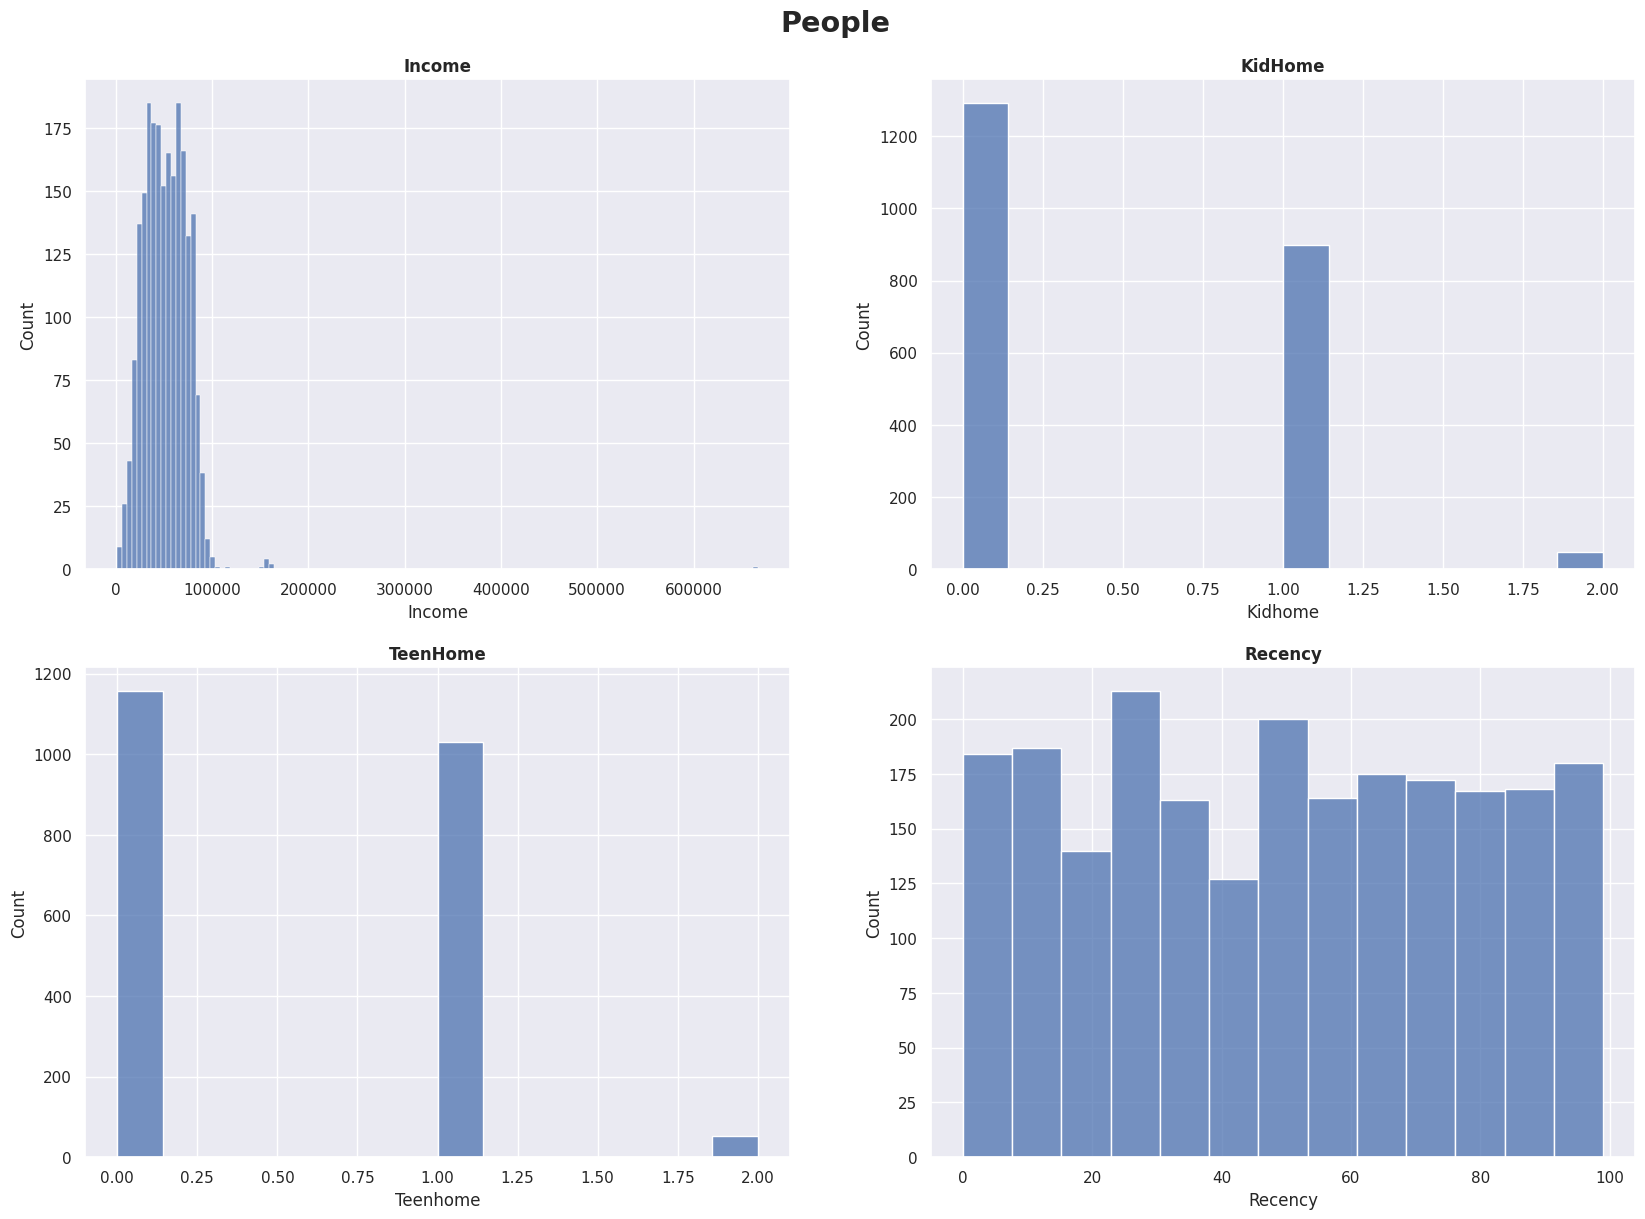

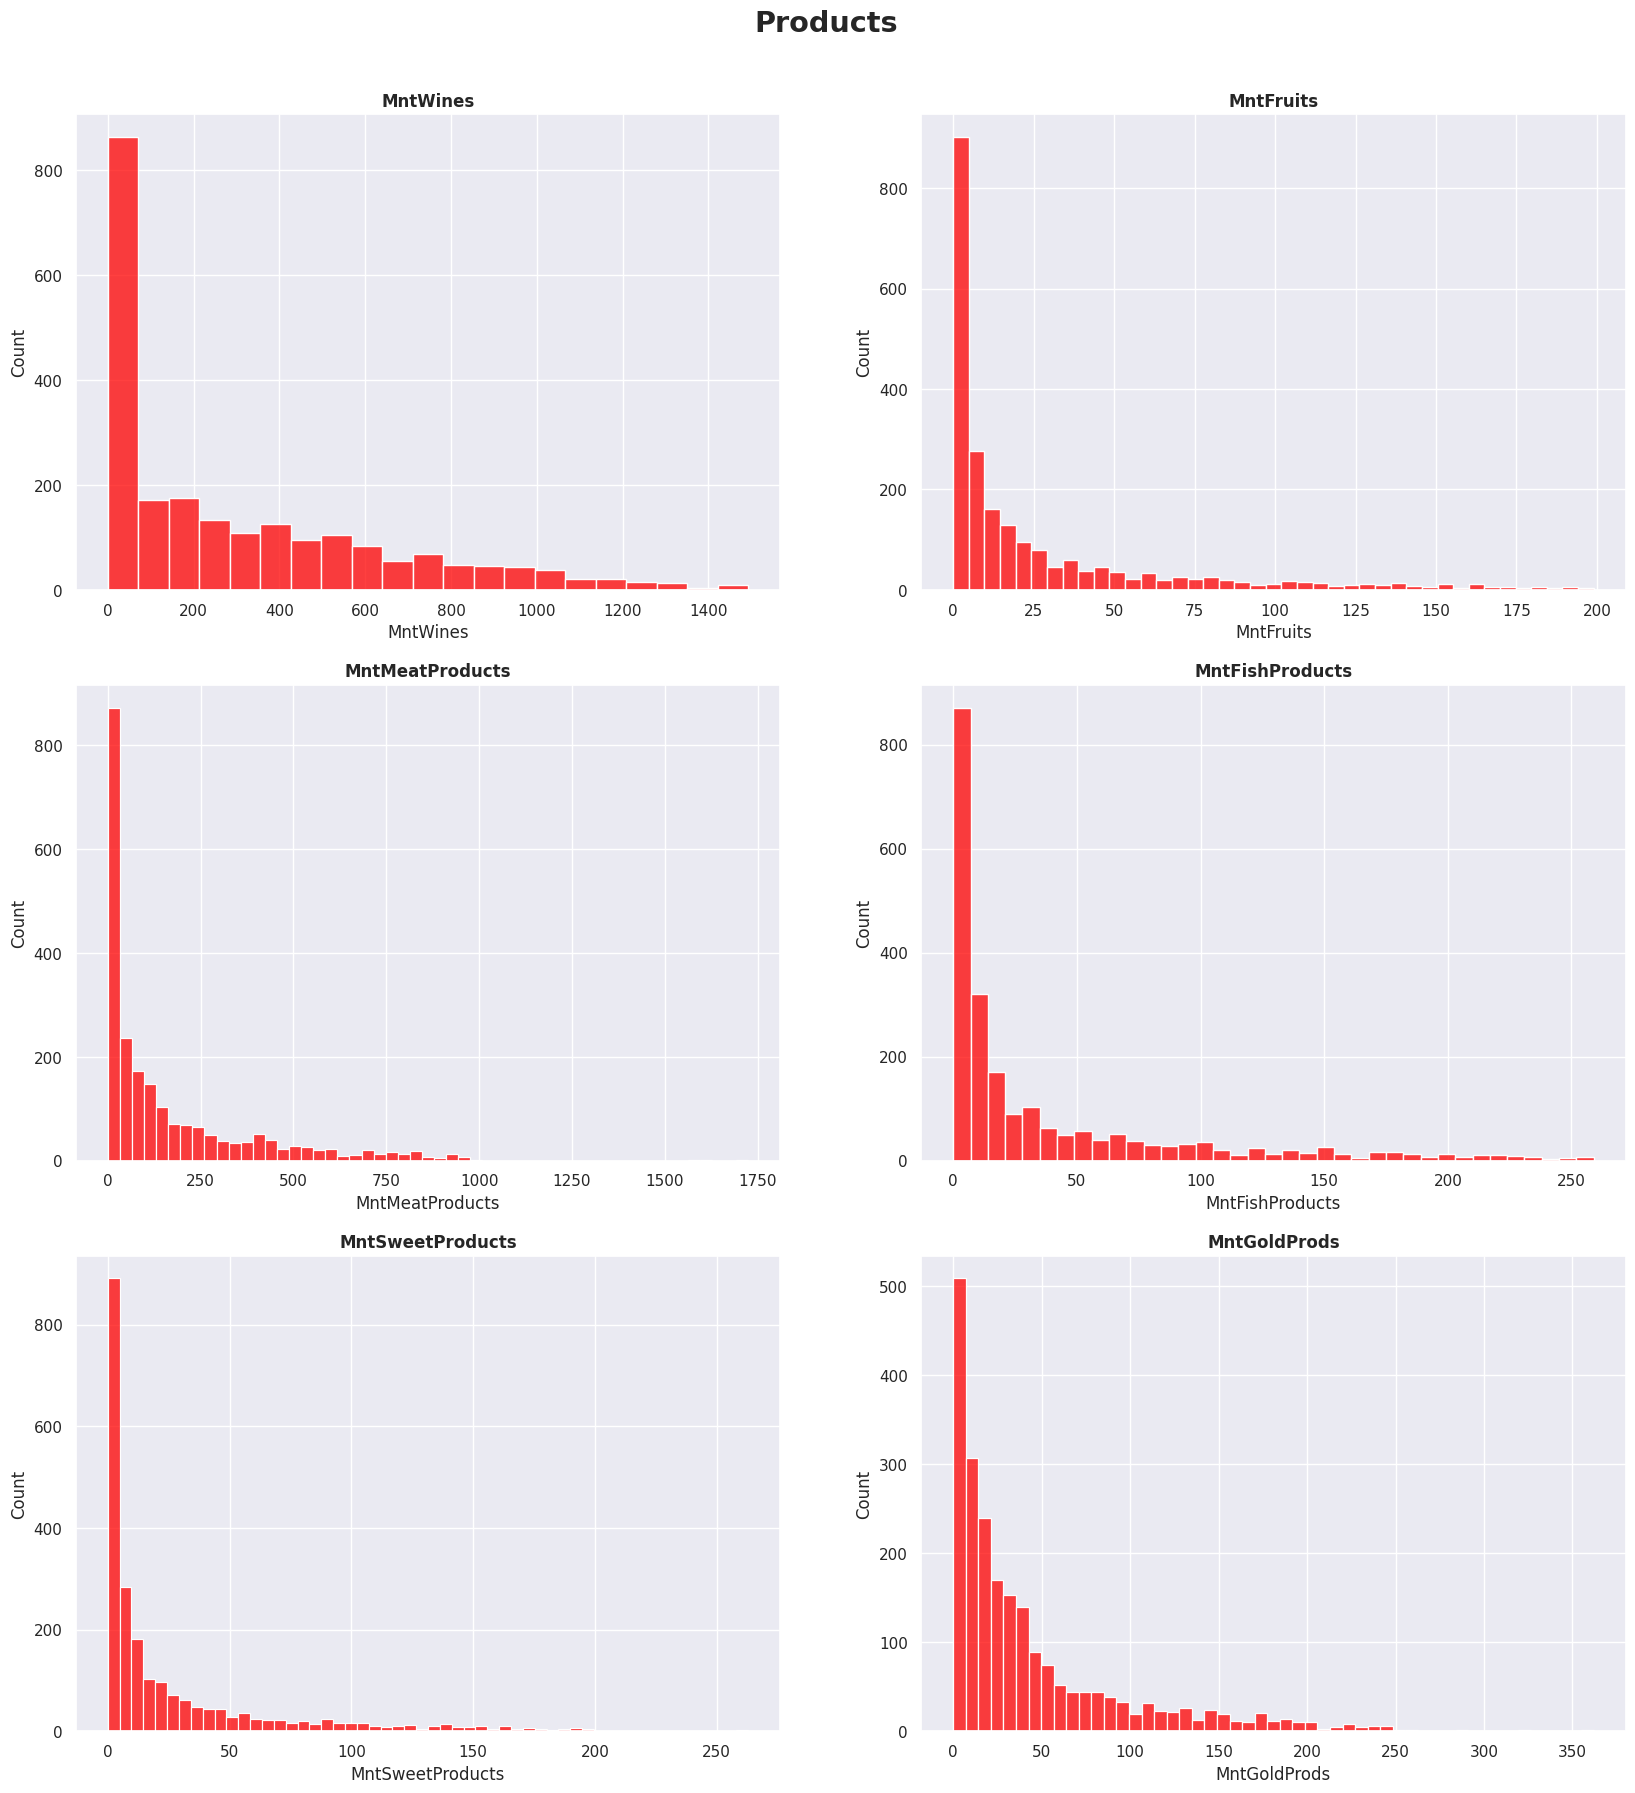

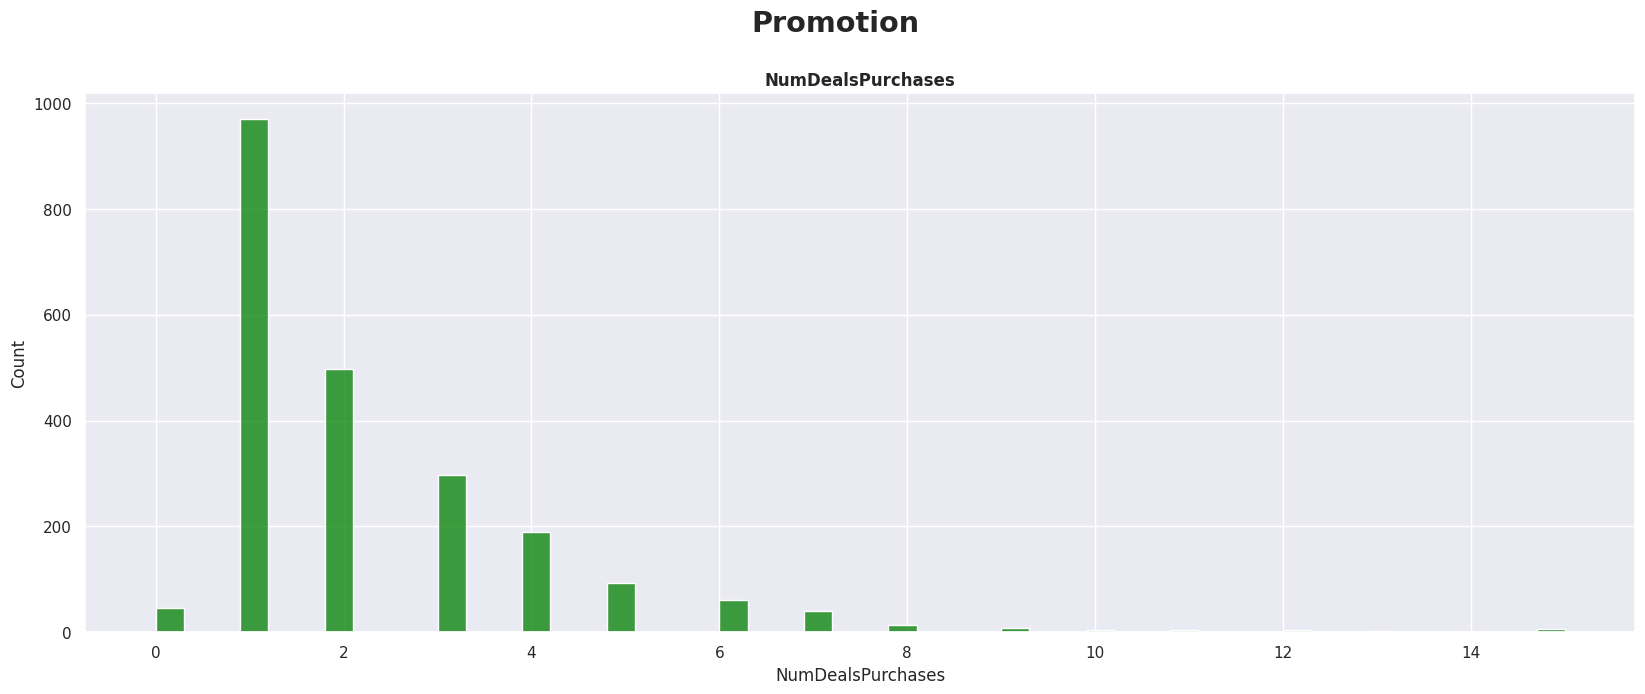

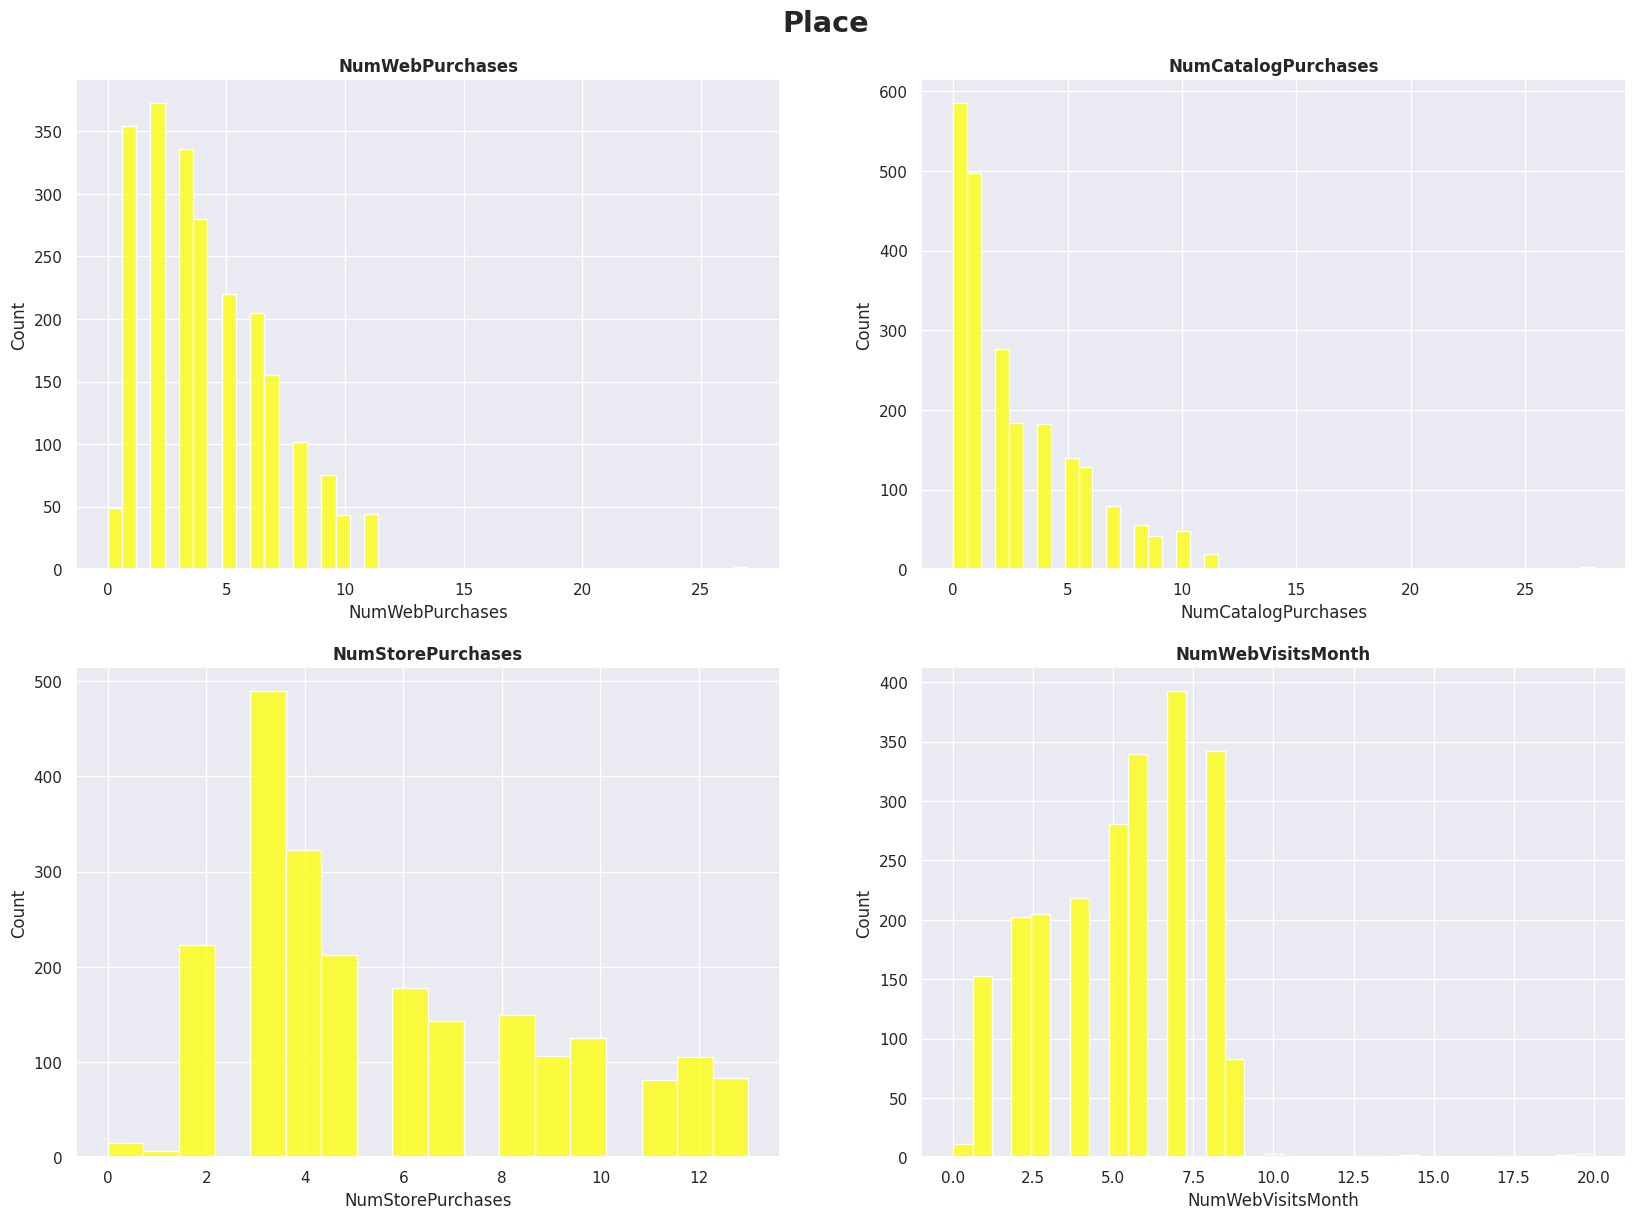

In [ ]:
#Ajustes de la figura 1.
plt.figure(figsize=(20,14))
plt.suptitle('People', y=0.93, fontsize='xx-large', fontweight='bold')

#Gráfica de la columna 'Income', la cual indica el ingreso anual familiar del cliente.
plt.subplot(2,2,1);
sns.histplot(data=df, x='Income')
plt.title('Income', fontweight='bold')

#Gráfica de la columna 'Kidhome', la cual indica el número de niños en el hogar del cliente.
plt.subplot(2,2,2);
sns.histplot(data=df, x='Kidhome')
plt.title('KidHome', fontweight='bold')

#Gráfica de la columna 'Teenhome', la cual indica el número de adolescentes en el hogar del cliente.
plt.subplot(2,2,3);
sns.histplot(data=df, x='Teenhome')
plt.title('TeenHome', fontweight='bold')

#Gráfica de la columna 'Recency', la cual indica el número de días desde la última compra del cliente.
plt.subplot(2,2,4);
sns.histplot(data=df, x='Recency')
plt.title('Recency', fontweight="bold")

#Ajustes de la figura 2.
plt.figure(figsize=(20,21))
plt.suptitle('Products', y=0.93, fontsize='xx-large', fontweight='bold')

#Gráfica de la columna 'MntWines', la cual indica el monto gastado en vino en los últimos dos años.
plt.subplot(3,2,1);
sns.histplot(data=df, x='MntWines', color='red')
plt.title('MntWines', fontweight='bold')

#Gráfica de la columna 'MntFruits', la cual indica el monto gastado en frutas en los últimos dos años.
plt.subplot(3,2,2);
sns.histplot(data=df, x='MntFruits', color='red')
plt.title('MntFruits', fontweight='bold')

#Gráfica de la columna 'MntMeatProducts', la cual indica el monto gastado en carne en los últimos dos años.
plt.subplot(3,2,3);
sns.histplot(data=df, x='MntMeatProducts', color='red')
plt.title('MntMeatProducts', fontweight='bold')

#Gráfica de la columna 'MntFishProducts', la cual indica el monto gastado en pescado en los últimos dos años.
plt.subplot(3,2,4);
sns.histplot(data=df, x='MntFishProducts', color='red')
plt.title('MntFishProducts', fontweight='bold')

#Gráfica de la columna 'MntSweetProducts', la cual indica el monto gastado en dulces en los últimos dos años.
plt.subplot(3,2,5);
sns.histplot(data=df, x='MntSweetProducts', color='red')
plt.title('MntSweetProducts', fontweight='bold')

#Gráfica de la columna 'MntGoldProducts', la cual indica el monto gastado en oro en los últimos dos años.
plt.subplot(3,2,6);
sns.histplot(data=df, x='MntGoldProds', color='red')
plt.title('MntGoldProds', fontweight='bold')

#Ajustes de la figura 3.
plt.figure(figsize=(20,7))
plt.suptitle('Promotion', y=1, fontsize='xx-large', fontweight='bold')

#Gráfica de la columna 'NumDealsPurchases', la cual indica el número de compras realizadas con descuento.
plt.subplot(1,1,1);
sns.histplot(data=df, x='NumDealsPurchases', color='green')
plt.title('NumDealsPurchases', fontweight='bold')

#Ajustes de la figura 4.
plt.figure(figsize=(20,14))
plt.suptitle('Place', y=0.93, fontsize='xx-large', fontweight='bold')

#Gráfica de la columna 'NumWebPurchases', la cual indica el número de compras realizadas a través del sitio web de la empresa.
plt.subplot(2,2,1);
sns.histplot(data=df, x='NumWebPurchases', color='yellow')
plt.title('NumWebPurchases', fontweight='bold')

#Gráfica de la columna 'NumCatalogPurchases', la cual indica el número de compras realizadas mediante catálogo.
plt.subplot(2,2,2);
sns.histplot(data=df, x='NumCatalogPurchases', color='yellow')
plt.title('NumCatalogPurchases', fontweight='bold')

#Gráfica de la columna 'NumStorePurchases', la cual indica el número de compras realizadas directamente en tiendas.
plt.subplot(2,2,3);
sns.histplot(data=df, x='NumStorePurchases', color='yellow')
plt.title('NumStorePurchases', fontweight='bold')

#Gráfica de la columna 'NumWebVisitsMonth', la cual indica el número de visitas al sitio web de la empresa.
plt.subplot(2,2,4);
sns.histplot(data=df, x="NumWebVisitsMonth", color="yellow")
plt.title("NumWebVisitsMonth", fontweight="bold")

plt.show()

# Gráficas de datos categóricos (barplot)

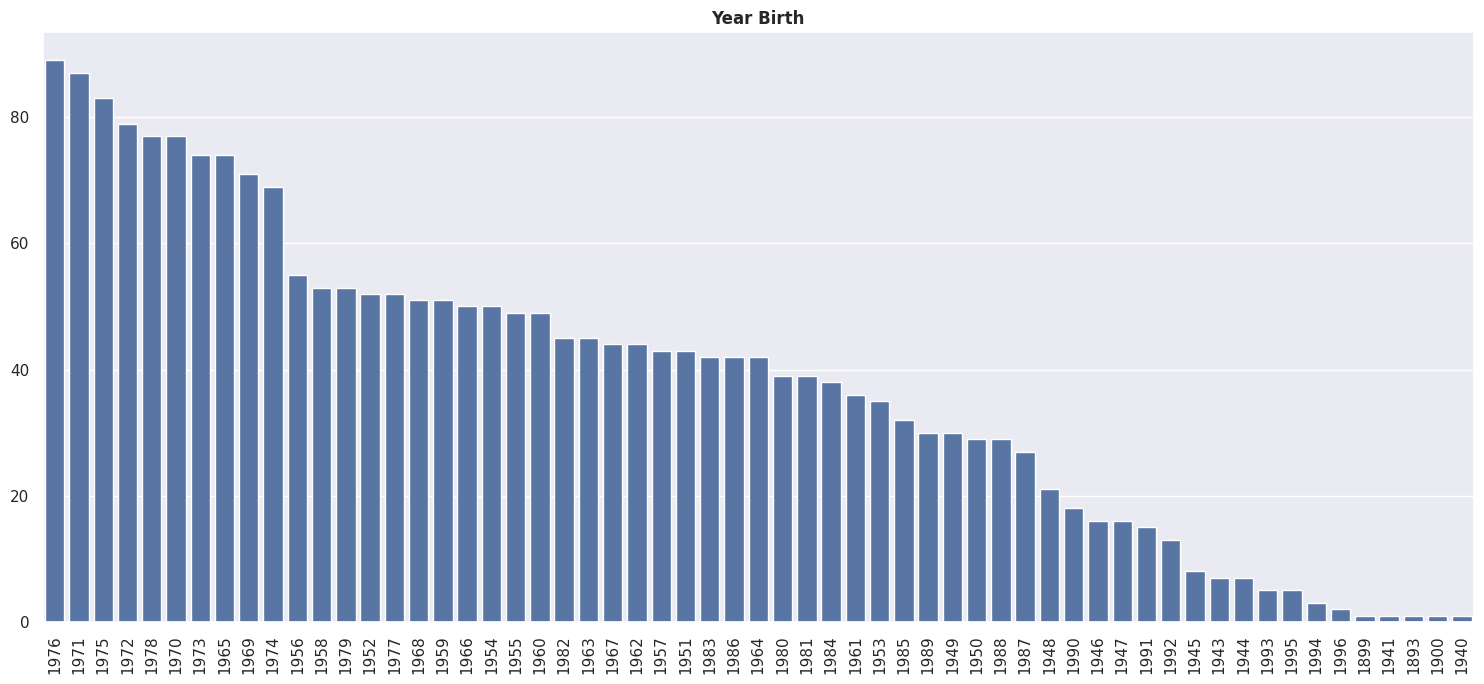

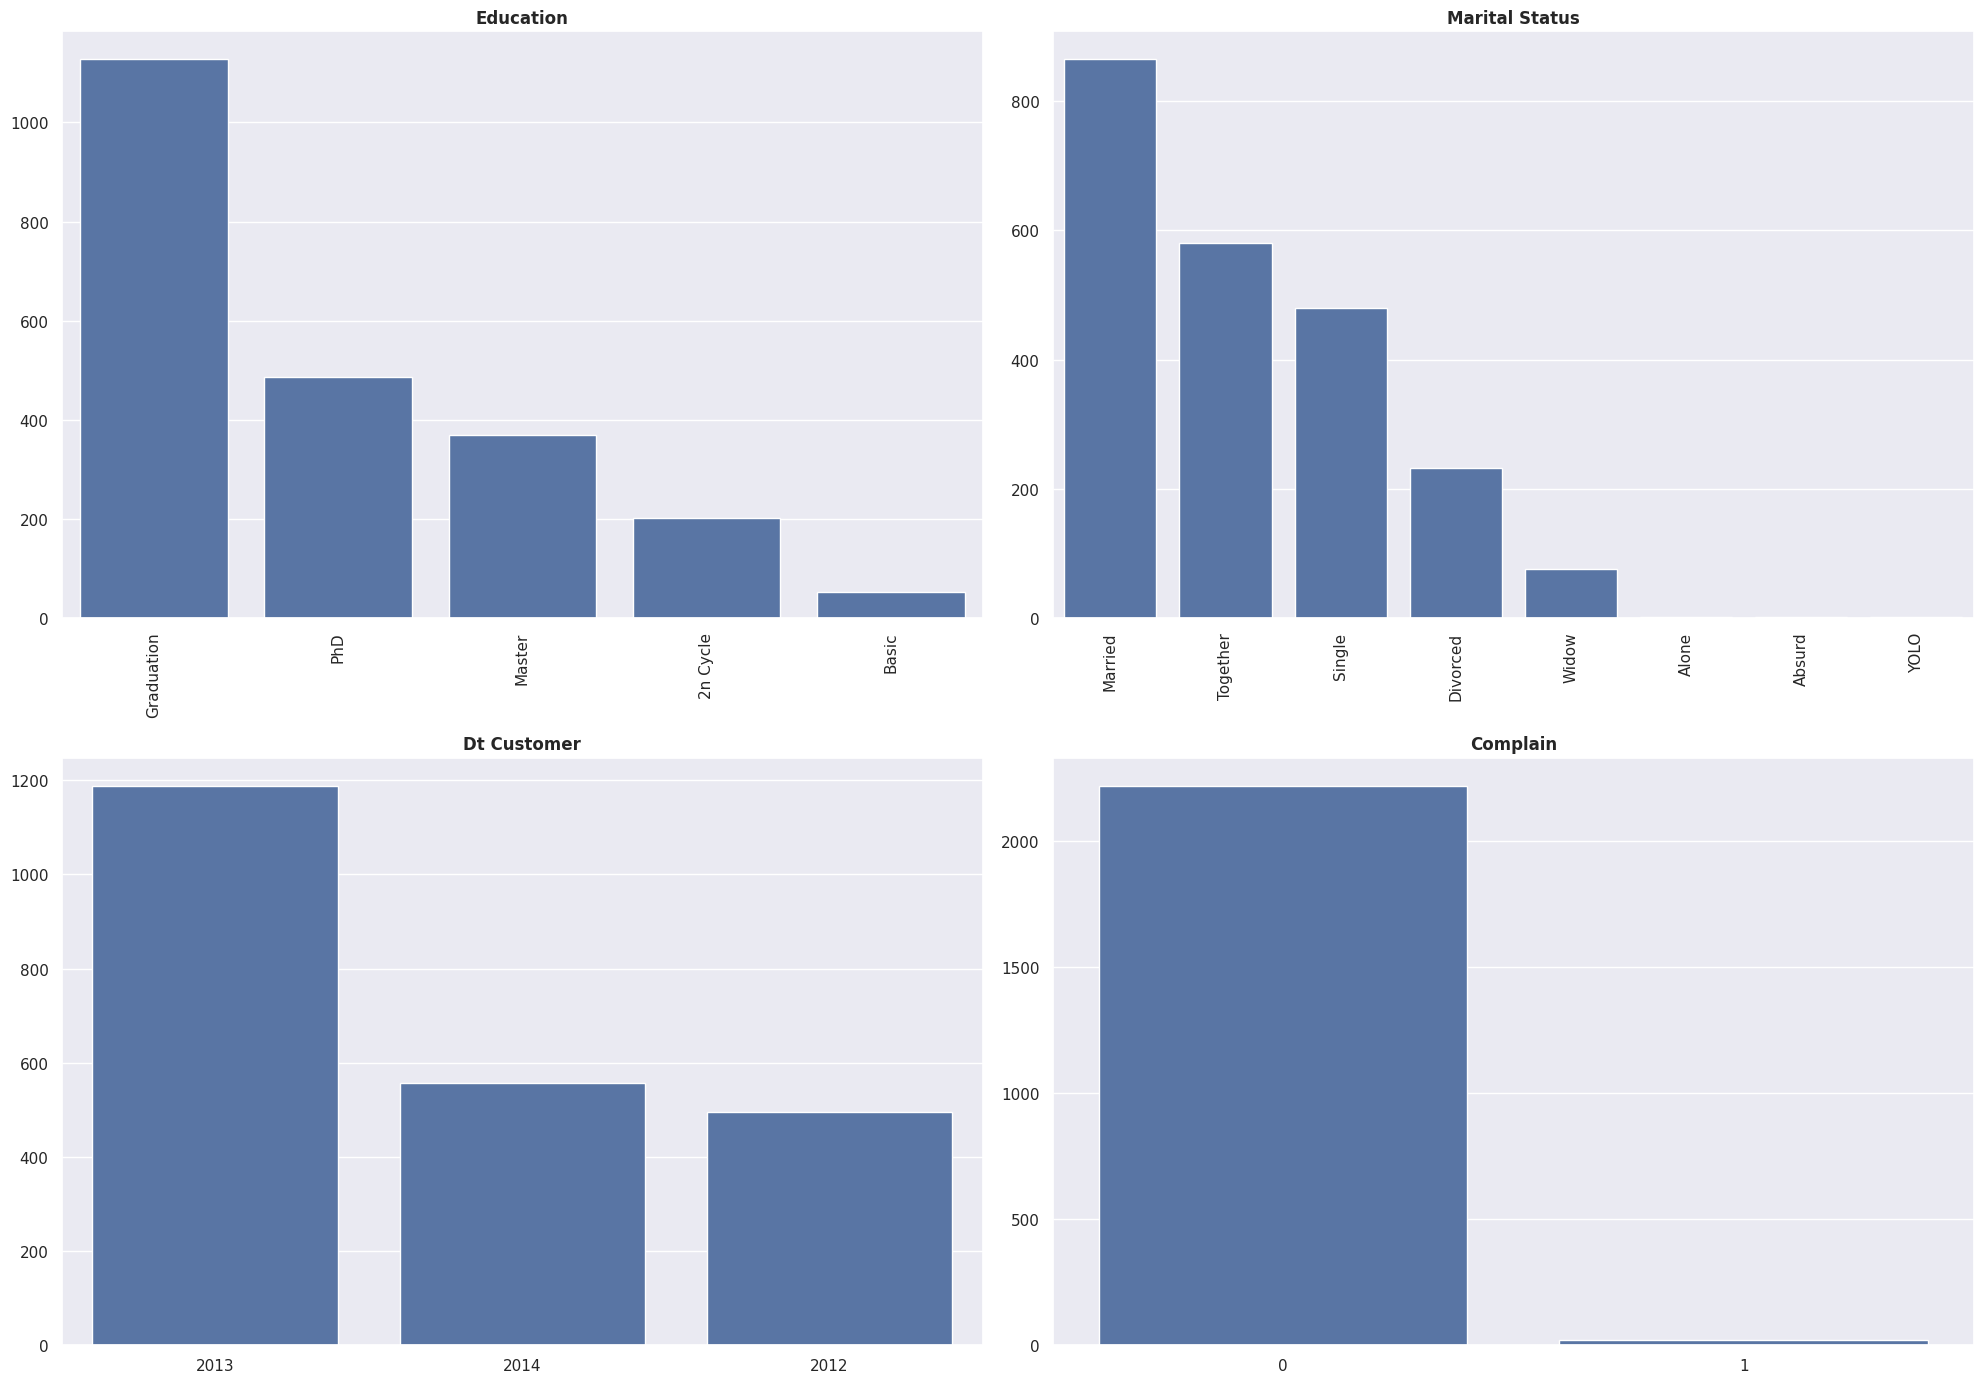

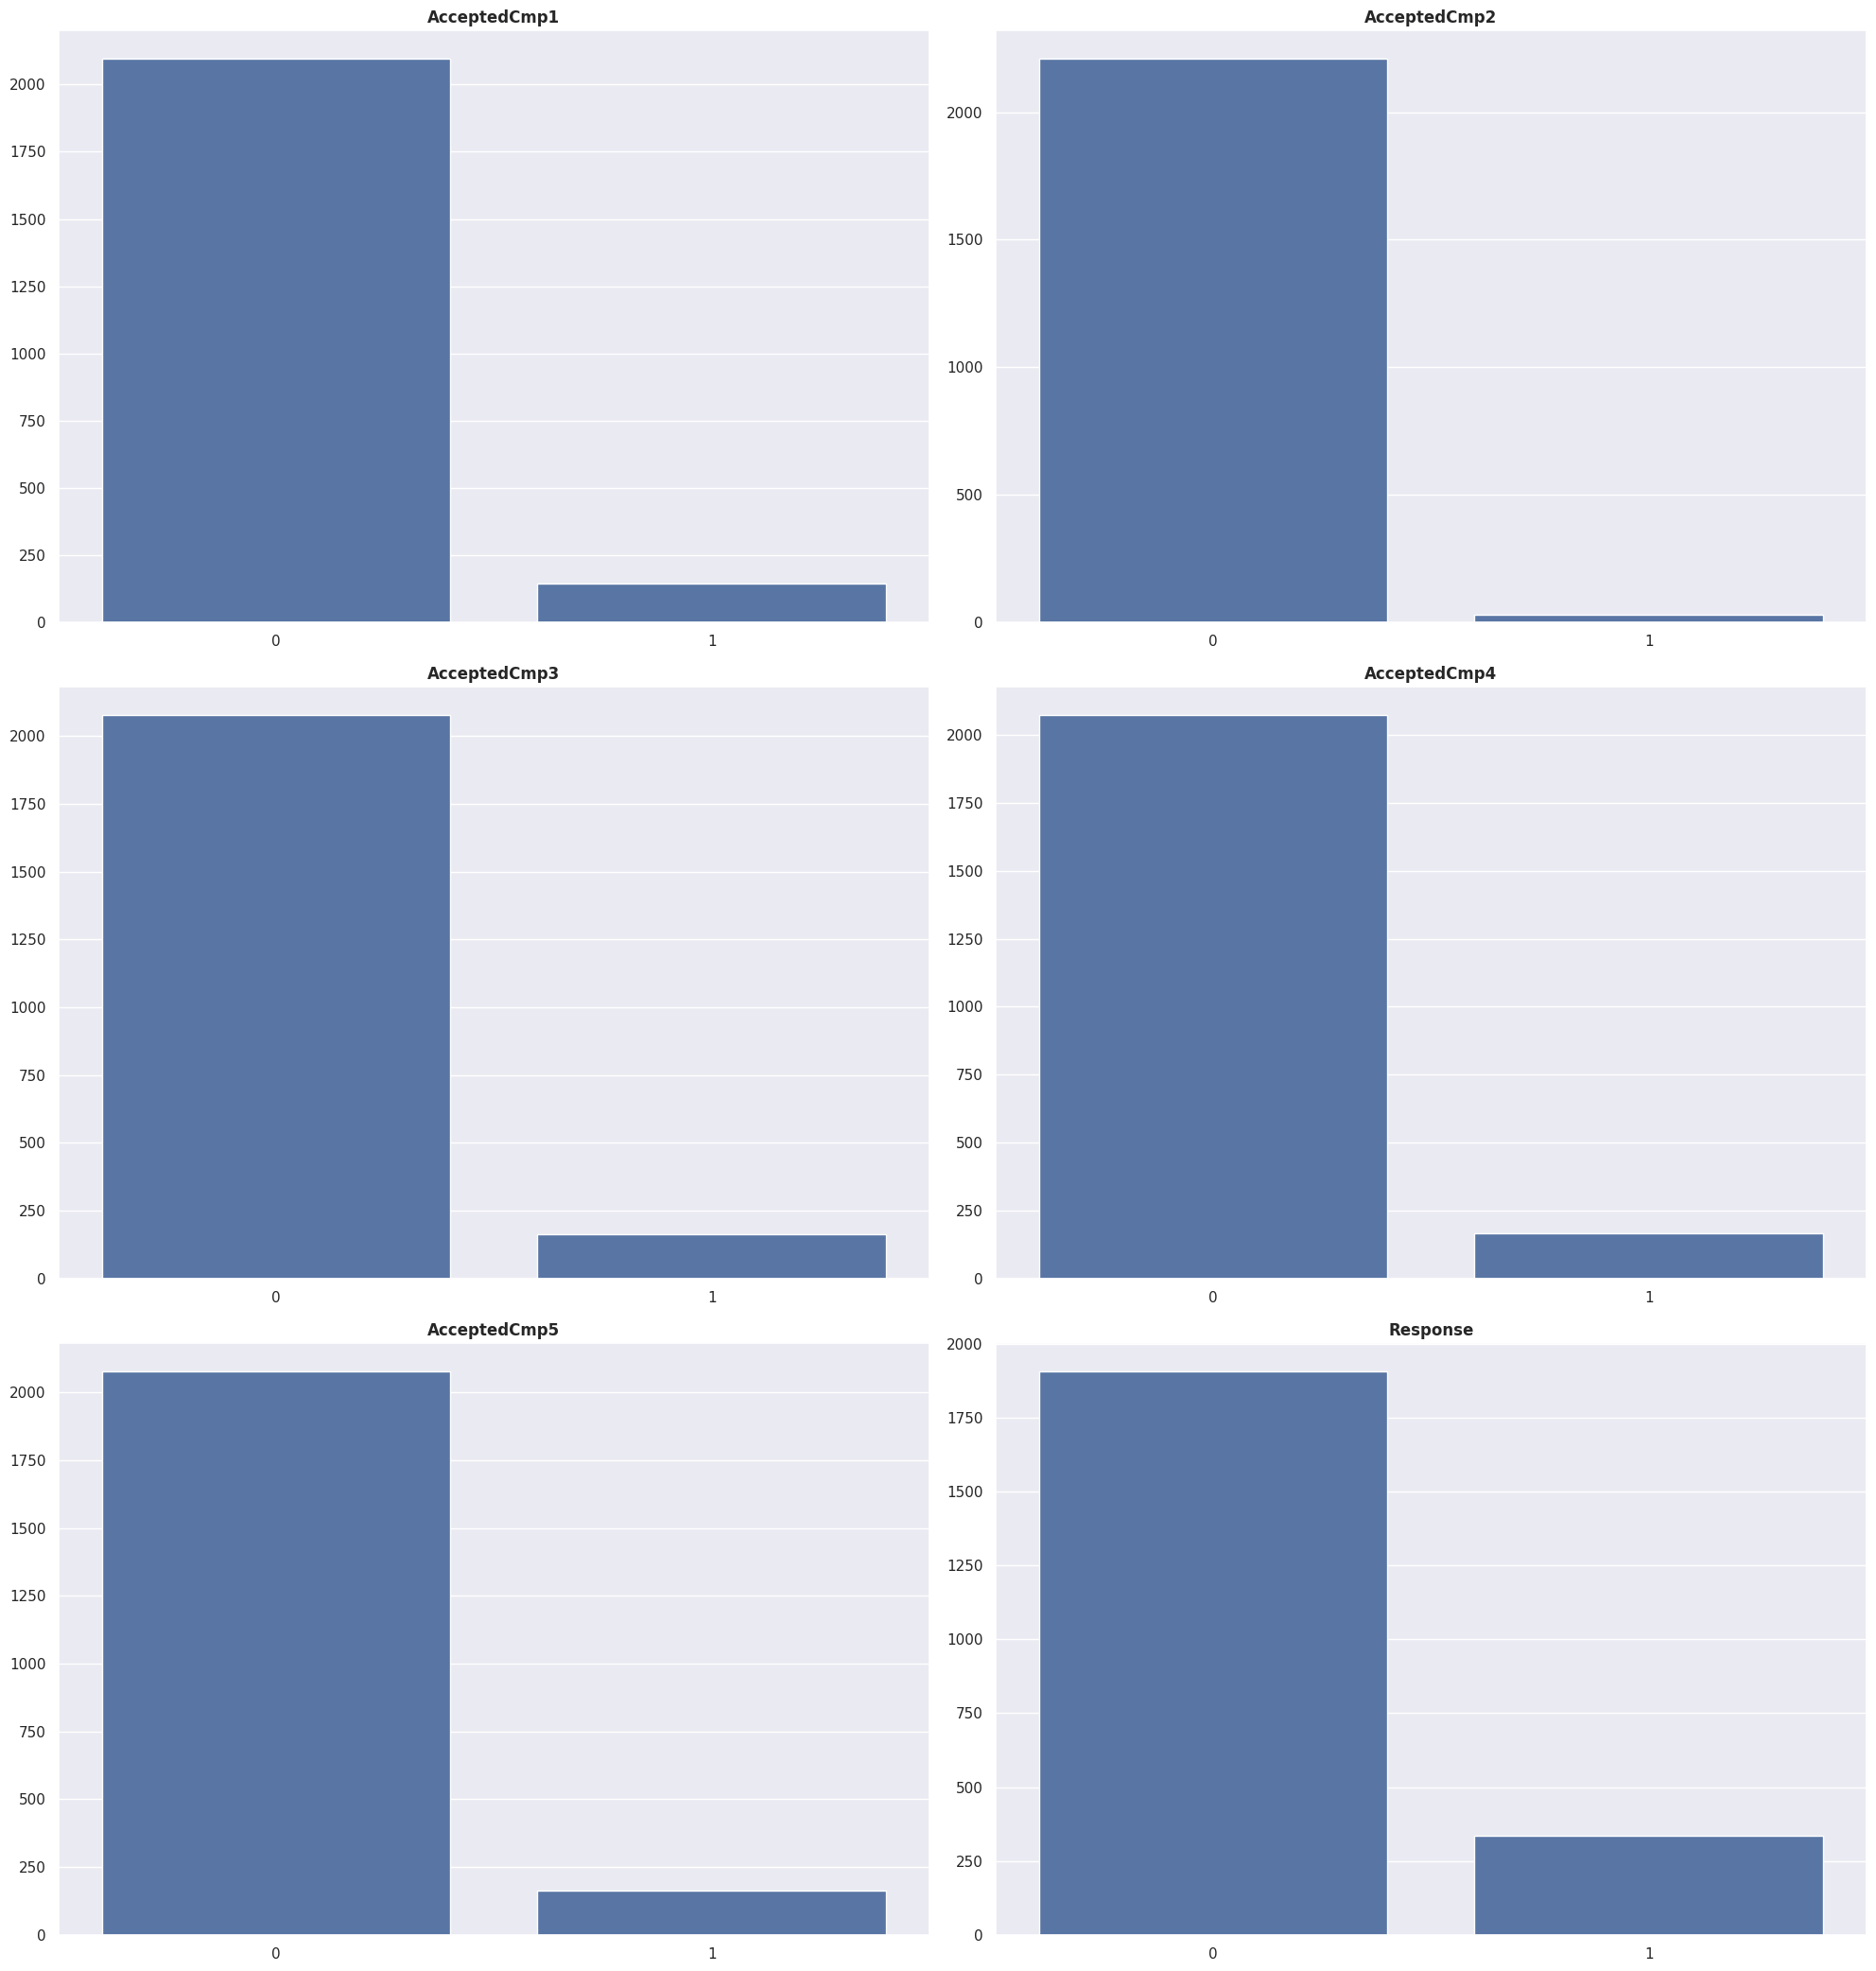

In [ ]:
# Ajustes de la figura 1.
plt.figure(figsize=(15, 7))

# Gráfica de la columna 'Year_Birth', la cual indica el año de nacimiento del cliente.
plt.subplot(1, 1, 1)
sns.countplot(x='Year_Birth', data=df, order=df['Year_Birth'].value_counts().index)
plt.xlabel('')
plt.ylabel('')
plt.title('Year Birth', fontweight="bold")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Ajustes de la figura 2.
plt.figure(figsize=(20, 14))
plt.subplots_adjust(hspace=0.3)

# Gráfica de la columna 'Education', la cual indica el nivel de educación del cliente.
plt.subplot(2, 2, 1)
sns.countplot(x='Education', data=df, order=df['Education'].value_counts().index)
plt.xlabel('')
plt.ylabel('')
plt.title('Education', fontweight="bold")
plt.xticks(rotation=90)

# Gráfica de la columna 'Marital_Status', la cual indica el estado civil del cliente.
plt.subplot(2, 2, 2)
sns.countplot(x='Marital_Status', data=df, order=df['Marital_Status'].value_counts().index)
plt.xlabel('')
plt.ylabel('')
plt.title('Marital Status', fontweight="bold")
plt.xticks(rotation=90)

# Gráfica de la columna 'Dt_Customer', la cual indica la fecha de inscripción de cliente (en la grafica solo se muestra el año).
plt.subplot(2, 2, 3)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year
sns.countplot(x='Dt_Customer_Year', data=df, order=df['Dt_Customer_Year'].value_counts().index)
plt.xlabel('')
plt.ylabel('')
plt.title('Dt Customer', fontweight="bold")

# Gráfica de la columna 'Complain', la cual indica si el cliente se quejó en los últimos dos años (1 es sí y 0 no).
plt.subplot(2, 2, 4)
sns.countplot(x='Complain', data=df, order=df['Complain'].value_counts().index)
plt.xlabel('')
plt.ylabel('')
plt.title('Complain', fontweight="bold")

plt.tight_layout()
plt.show()

# Ajustes de la figura 3.
plt.figure(figsize=(20, 21))
plt.subplots_adjust(hspace=0.30)

# Gráfica de la columna 'AcceptedCmp1', la cual indica si el cliente aceptó la oferta en la primera campaña (1 es sí y 0 no).
plt.subplot(3, 2, 1)
sns.countplot(x='AcceptedCmp1', data=df, order=df['AcceptedCmp1'].value_counts().index)
plt.xlabel('')
plt.ylabel('')
plt.title('AcceptedCmp1', fontweight="bold")

# Gráfica de la columna 'AcceptedCmp2', la cual indica si el cliente aceptó la oferta en la segunda campaña (1 es sí y 0 no).
plt.subplot(3, 2, 2)
sns.countplot(x='AcceptedCmp2', data=df, order=df['AcceptedCmp2'].value_counts().index)
plt.xlabel('')
plt.ylabel('')
plt.title('AcceptedCmp2', fontweight="bold")

# Gráfica de la columna 'AcceptedCmp3', la cual indica si el cliente aceptó la oferta en la tercera campaña (1 es sí y 0 no).
plt.subplot(3, 2, 3)
sns.countplot(x='AcceptedCmp3', data=df, order=df['AcceptedCmp3'].value_counts().index)
plt.xlabel('')
plt.ylabel('')
plt.title('AcceptedCmp3', fontweight="bold")

# Gráfica de la columna 'AcceptedCmp4', la cual indica si el cliente aceptó la oferta en la cuarta campaña (1 es sí y 0 no).
plt.subplot(3, 2, 4)
sns.countplot(x='AcceptedCmp4', data=df, order=df['AcceptedCmp4'].value_counts().index)
plt.xlabel('')
plt.ylabel('')
plt.title('AcceptedCmp4', fontweight="bold")

# Gráfica de la columna 'AcceptedCmp5', la cual indica si el cliente aceptó la oferta en la quinta campaña (1 es sí y 0 no).
plt.subplot(3, 2, 5)
sns.countplot(x='AcceptedCmp5', data=df, order=df['AcceptedCmp5'].value_counts().index)
plt.xlabel('')
plt.ylabel('')
plt.title('AcceptedCmp5', fontweight="bold")

# Gráfica de la columna 'Response', la cual indica si el cliente aceptó la oferta en la última campaña (1 es sí y 0 no).
plt.subplot(3, 2, 6)
sns.countplot(x='Response', data=df, order=df['Response'].value_counts().index)
plt.xlabel('')
plt.ylabel('')
plt.title('Response', fontweight="bold")

plt.tight_layout()
plt.show()

# Gráficas de datos categóricos (pie chart)

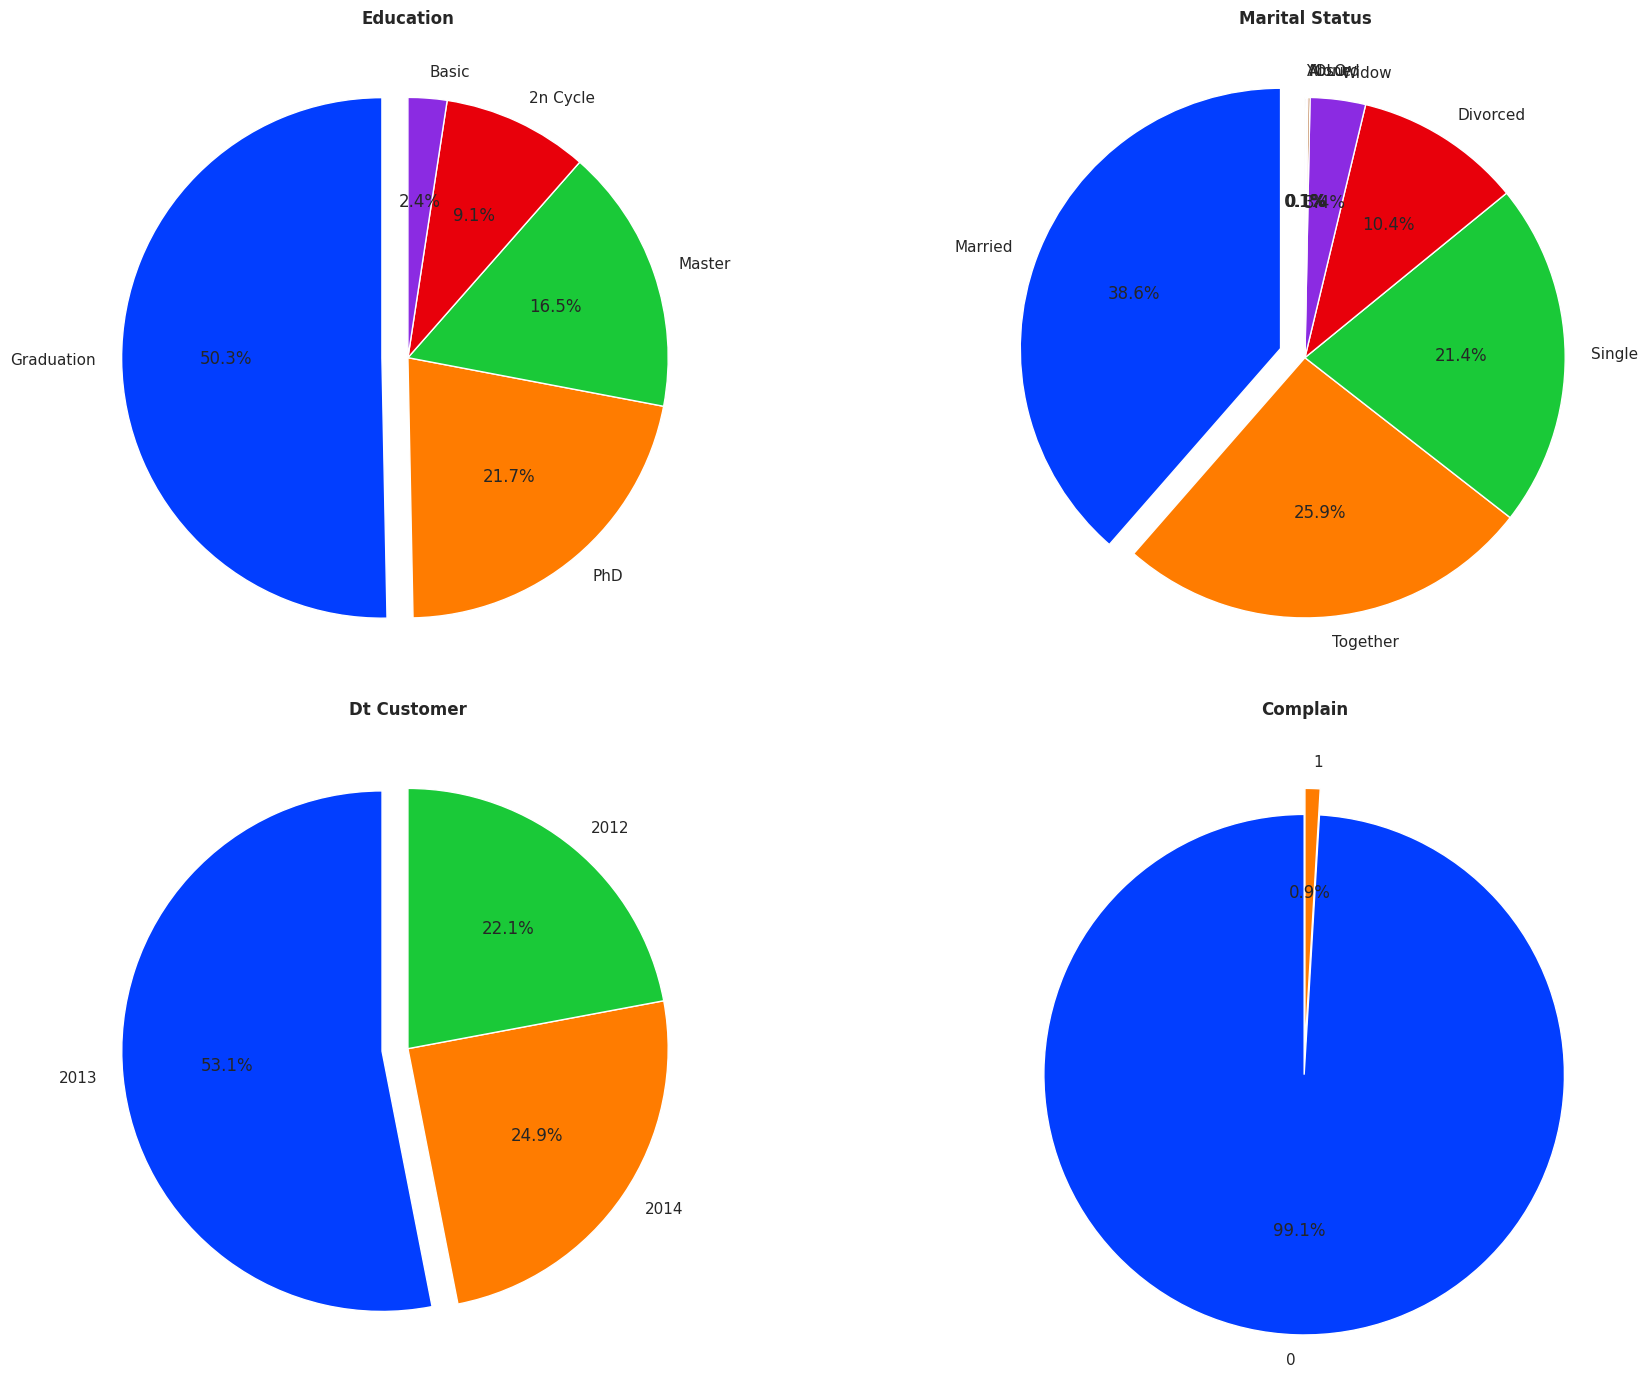

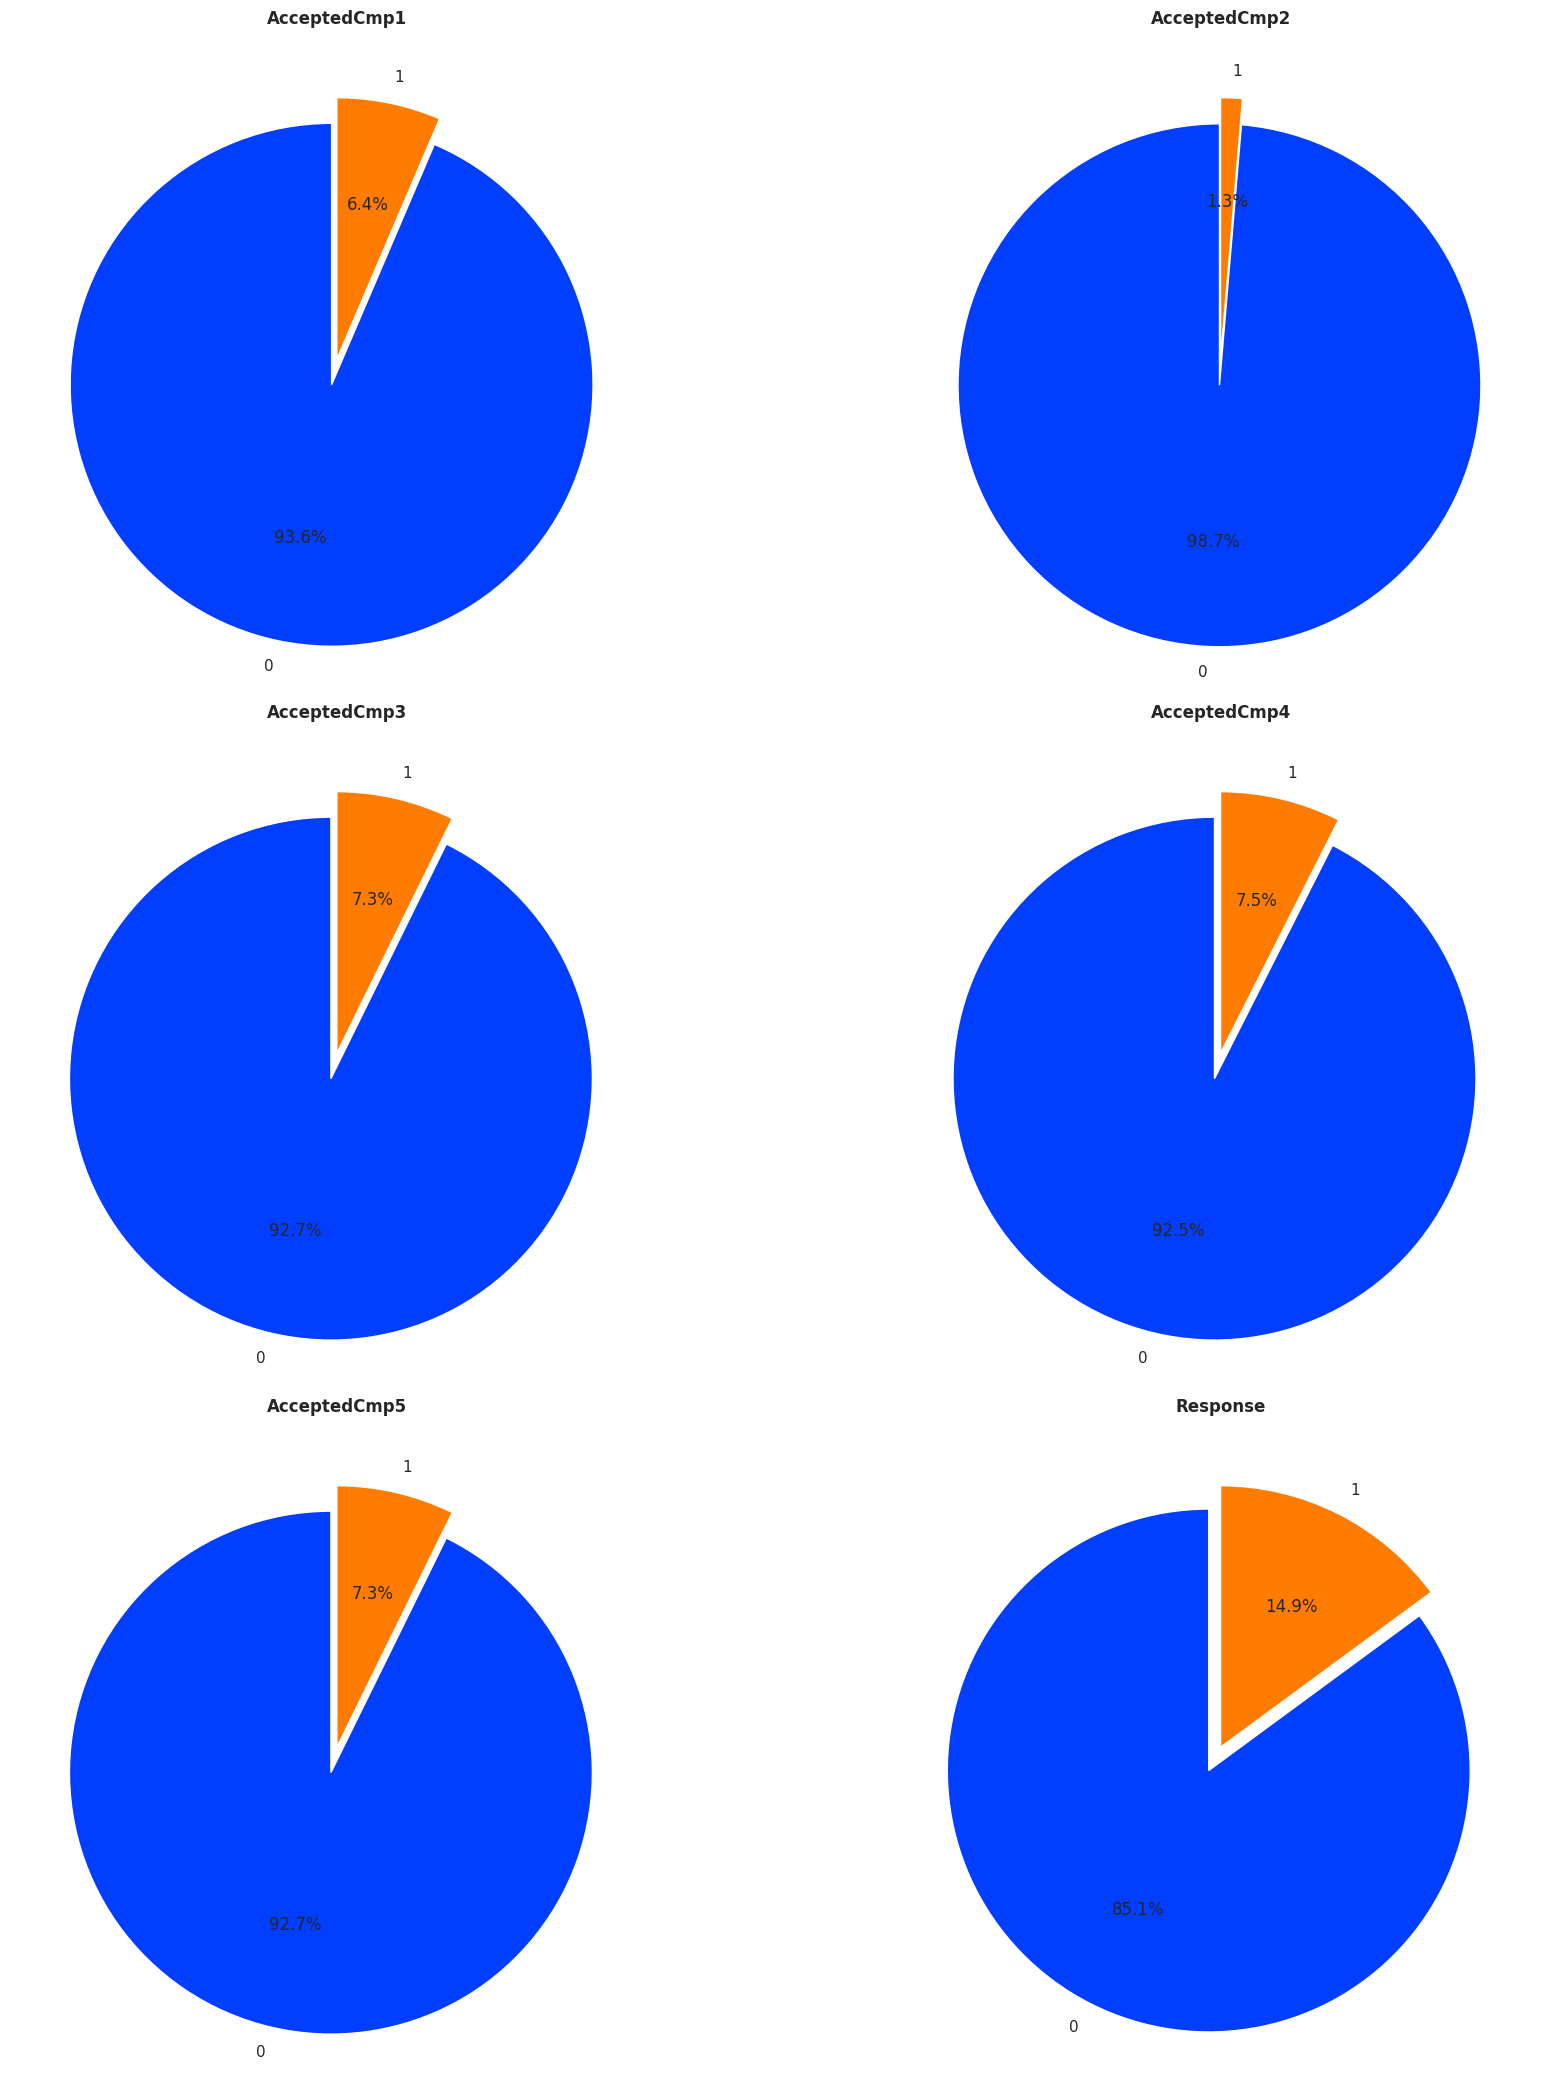

In [ ]:

# Ajustes de la figura 1.
plt.figure(figsize=(20, 14))
plt.subplots_adjust(hspace=0.3)

# Gráfica de la columna 'Education', la cual indica el nivel de educación del cliente.
plt.subplot(2, 2, 1)
ED = df['Education'].value_counts()
colors = sns.color_palette('bright')
explode = (0.1, 0, 0, 0, 0)
plt.pie(ED, labels=ED.index, startangle=90, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('Education', fontweight="bold")

# Gráfica de la columna 'Marital_Status', la cual indica el estado civil del cliente.
plt.subplot(2, 2, 2)
MT = df['Marital_Status'].value_counts()
colors = sns.color_palette('bright')
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
plt.pie(MT, labels=MT.index, startangle=90, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('Marital Status', fontweight="bold")

# Gráfica de la columna 'Dt_Customer', la cual indica la fecha de inscripción de cliente (en la gráfica solo se muestra el año).
plt.subplot(2, 2, 3)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year
DC = df['Dt_Customer_Year'].value_counts()
colors = sns.color_palette('bright')
explode = (0.1, 0, 0)
plt.pie(DC, labels=DC.index, startangle=90, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('Dt Customer', fontweight="bold")

# Gráfica de la columna 'Complain', la cual indica si el cliente se quejó en los últimos dos años (1 es sí y 0 no).
plt.subplot(2, 2, 4)
CL = df['Complain'].value_counts()
colors = sns.color_palette('bright')
explode = (0.1, 0)
plt.pie(CL, labels=CL.index, startangle=90, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('Complain', fontweight="bold")

plt.tight_layout()
plt.show()

# Ajustes de la figura 3.
plt.figure(figsize=(20, 21))
plt.subplots_adjust(hspace=0.15)

# Gráfica de la columna 'AcceptedCmp1', la cual indica si el cliente aceptó la oferta en la primera campaña (1 es sí y 0 no).
plt.subplot(3, 2, 1)
C1 = df['AcceptedCmp1'].value_counts()
colors = sns.color_palette('bright')
explode = (0.1, 0)
plt.pie(C1, labels=C1.index, startangle=90, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('AcceptedCmp1', fontweight="bold")

# Gráfica de la columna 'AcceptedCmp2', la cual indica si el cliente aceptó la oferta en la segunda campaña (1 es sí y 0 no).
plt.subplot(3, 2, 2)
C2 = df['AcceptedCmp2'].value_counts()
colors = sns.color_palette('bright')
explode = (0.1, 0)
plt.pie(C2, labels=C2.index, startangle=90, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('AcceptedCmp2', fontweight="bold")

# Gráfica de la columna 'AcceptedCmp3', la cual indica si el cliente aceptó la oferta en la tercera campaña (1 es sí y 0 no).
plt.subplot(3, 2, 3)
C3 = df['AcceptedCmp3'].value_counts()
colors = sns.color_palette('bright')
explode = (0.1, 0)
plt.pie(C3, labels=C3.index, startangle=90, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('AcceptedCmp3', fontweight="bold")

# Gráfica de la columna 'AcceptedCmp4', la cual indica si el cliente aceptó la oferta en la cuarta campaña (1 es sí y 0 no).
plt.subplot(3, 2, 4)
C4 = df['AcceptedCmp4'].value_counts()
colors = sns.color_palette('bright')
explode = (0.1, 0)
plt.pie(C4, labels=C4.index, startangle=90, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('AcceptedCmp4', fontweight="bold")

# Gráfica de la columna 'AcceptedCmp5', la cual indica si el cliente aceptó la oferta en la quinta campaña (1 es sí y 0 no).
plt.subplot(3, 2, 5)
C5 = df['AcceptedCmp5'].value_counts()
colors = sns.color_palette('bright')
explode = (0.1, 0)
plt.pie(C5, labels=C5.index, startangle=90, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('AcceptedCmp5', fontweight="bold")

# Gráfica de la columna 'Response', la cual indica si el cliente aceptó la oferta en la última campaña (1 es sí y 0 no).
plt.subplot(3, 2, 6)
RS = df['Response'].value_counts()
colors = sns.color_palette('bright')
explode = (0.1, 0)
plt.pie(RS, labels=RS.index, startangle=90, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('Response', fontweight="bold")

plt.tight_layout()
plt.show()

# Scatter (matplotlib)

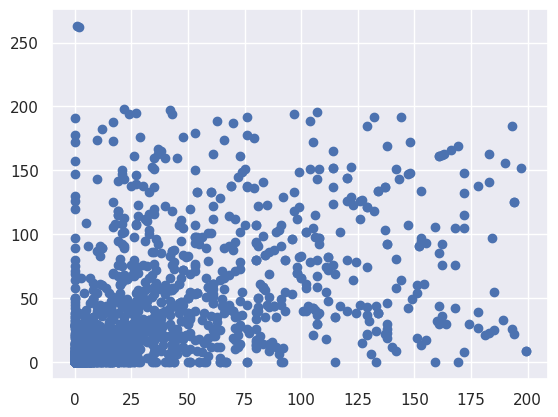

In [ ]:
df[["MntSweetProducts", "MntFruits"]].head()
fig,ax= plt.subplots()
ax.scatter(df.MntFruits,df.MntSweetProducts)
plt.show()

# Jointplot (seaborn)

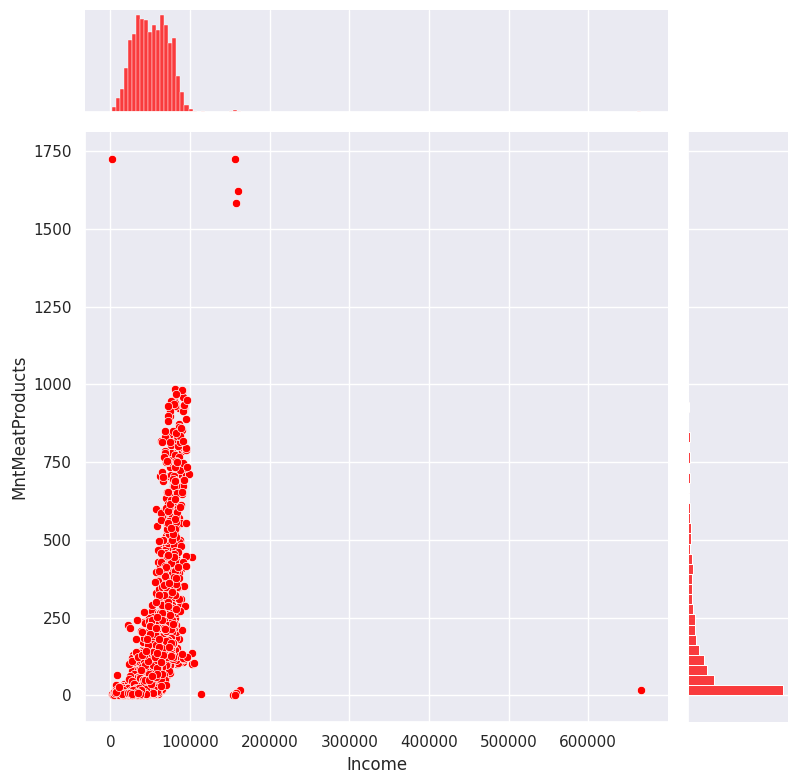

In [ ]:
df[["Income", "MntMeatProducts"]].head()
sns.jointplot(x='Income', y='MntMeatProducts', data=df, color="red", height=8)
plt.show()

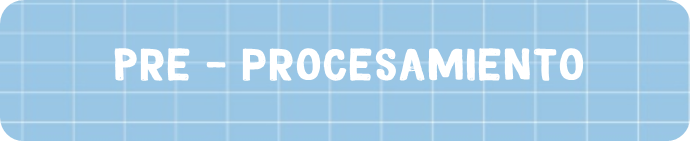

In [ ]:
from IPython.display import Image
Image("/content/procesamiento.png")

In [ ]:
# Eliminación de filas con valores faltantes (NaN)
df = df.dropna()

# Eliminación de columnas innecesarias
df = df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer'])

# Simplificación de categorias en columnas y unión de datos
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow','Absurd', 'YOLO', 'Alone'],'Single')
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduate')
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)

# Transformación de 'Year_Birth' a 'Age'
año_actual = datetime.now().year
df['Age'] = año_actual - df['Year_Birth']
df.drop(columns=['Year_Birth'], inplace=True)

# Tranformación de datos categóricos a datos numéricos
le = LabelEncoder()
columnas_categoricas = df.select_dtypes(include=['object']).columns
for i in range(len(columnas_categoricas)):
  df[columnas_categoricas[i]] = le.fit_transform(df[columnas_categoricas[i]])

# Eliminar filas con edad mayor a 90 años
df = df[(df["Age"]<90)]

# Revisión de las columnas del data, luego de los cambios
print("Columnas del dataset luego del pre procesamiento: ")
print(df.info())
df.describe()

Columnas del dataset luego del pre procesamiento: 
<class 'pandas.core.frame.DataFrame'>
Index: 2213 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2213 non-null   int64  
 1   Marital_Status     2213 non-null   int64  
 2   Income             2213 non-null   float64
 3   Recency            2213 non-null   int64  
 4   Complain           2213 non-null   int64  
 5   Response           2213 non-null   int64  
 6   Dt_Customer_Year   2213 non-null   int32  
 7   Kids               2213 non-null   int64  
 8   Expenses           2213 non-null   int64  
 9   TotalAcceptedCmp   2213 non-null   int64  
 10  NumTotalPurchases  2213 non-null   int64  
 11  Age                2213 non-null   int64  
dtypes: float64(1), int32(1), int64(10)
memory usage: 216.1 KB
None


,Education,Marital_Status,Income,Recency,Complain,Response,Dt_Customer_Year,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age
count,2213.000000,2213.00000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000
mean,0.024401,0.35427,52236.581563,49.007682,0.009038,0.150474,2013.028016,0.947582,607.021690,0.298238,14.889742,55.082693
std,0.154326,0.47840,25178.603047,28.941864,0.094657,0.357617,0.685771,0.749297,602.488663,0.679446,7.670341,11.700216
min,0.000000,0.00000,1730.000000,0.000000,0.000000,0.000000,2012.000000,0.000000,5.000000,0.000000,0.000000,28.000000
25%,0.000000,0.00000,35246.000000,24.000000,0.000000,0.000000,2013.000000,0.000000,69.000000,0.000000,8.000000,47.000000
50%,0.000000,0.00000,51373.000000,49.000000,0.000000,0.000000,2013.000000,1.000000,397.000000,0.000000,15.000000,54.000000
75%,0.000000,1.00000,68487.000000,74.000000,0.000000,0.000000,2013.000000,1.000000,1048.000000,0.000000,21.000000,65.000000
max,1.000000,1.00000,666666.000000,99.000000,1.000000,1.000000,2014.000000,3.000000,2525.000000,4.000000,44.000000,84.000000


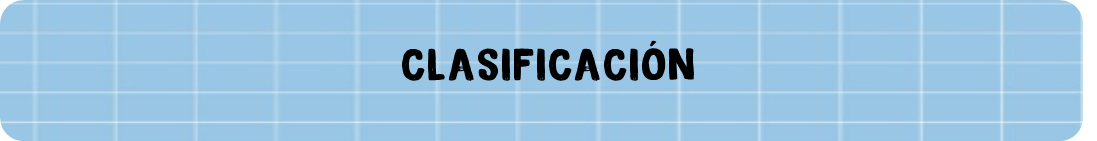

In [ ]:
Image("/content/clasificacion.png")

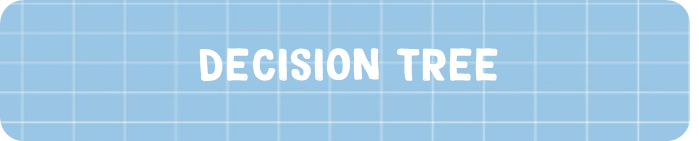

In [ ]:
Image("/content/decision tree.png")

In [ ]:
#@title **POR DEFECTO** DecisionTreeClassifier
np.random.seed(21)
# ground truth Response
X = df.drop(columns=['Response'])
y = df['Response']

# División del conjunto de datos en entrenamiento (80 %) y prueba (20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Parte 1: Clasificación con parámetros por defecto
est_default = DecisionTreeClassifier(random_state=21)
est_default.fit(X_train, y_train)
y_pred_default = est_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred_default)

# Cálculo del accuracy
accuracy_default = accuracy_score(y_test, y_pred_default)

# Realización de la validación cruzada con el clasificador por defecto
kf = KFold(n_splits=10, shuffle=True, random_state=21)
cv_results_default = cross_val_score(est_default, X, y, cv=kf, scoring=make_scorer(accuracy_score))
cv_results_default_mean = np.mean(cv_results_default)
cv_results_default_std = np.std(cv_results_default)

# Imprimir los resultados del clasificador por defecto
print(f"Accuracy con parámetros por defecto:\n{accuracy_default}")
print(f"Resultados en la validación cruzada (parámetros por defecto):\n{cv_results_default}")
print(f"Media de los resultados en la validación cruzada (parámetros por defecto):\n{cv_results_default_mean}")
print(f"Desviación estándar de los resultados de la validación cruzada (parámetros por defecto):\n{cv_results_default_std}")

Accuracy con parámetros por defecto:
0.8216704288939052
Resultados en la validación cruzada (parámetros por defecto):
[0.83783784 0.80630631 0.84234234 0.83710407 0.85067873 0.8280543
 0.82352941 0.87782805 0.85067873 0.81900452]
Media de los resultados en la validación cruzada (parámetros por defecto):
0.8373364314540785
Desviación estándar de los resultados de la validación cruzada (parámetros por defecto):
0.018964939582250373


In [ ]:
#@title **TUNNING** DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20]
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=21), param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener resultados de la búsqueda de parámetros
results_df = pd.DataFrame(grid_search.cv_results_)
print("Resultados de la búsqueda de parámetros:")
for index, row in results_df.iterrows():
    print(f"Params: {row['params']}, Mean Accuracy: {row['mean_test_score']:.4f}, Std Accuracy: {row['std_test_score']:.4f}")

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("\nMejores parámetros encontrados:", best_params)

# Evaluar el mejor modelo encontrado en el conjunto de prueba
y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Accuracy con mejores parámetros en el conjunto de prueba:", accuracy_tuned)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Resultados de la búsqueda de parámetros:
Params: {'criterion': 'gini', 'max_depth': None}, Mean Accuracy: 0.8294, Std Accuracy: 0.0219
Params: {'criterion': 'gini', 'max_depth': 5}, Mean Accuracy: 0.8678, Std Accuracy: 0.0200
Params: {'criterion': 'gini', 'max_depth': 10}, Mean Accuracy: 0.8424, Std Accuracy: 0.0271
Params: {'criterion': 'gini', 'max_depth': 15}, Mean Accuracy: 0.8373, Std Accuracy: 0.0280
Params: {'criterion': 'gini', 'max_depth': 20}, Mean Accuracy: 0.8294, Std Accuracy: 0.0219
Params: {'criterion': 'entropy', 'max_depth': None}, Mean Accuracy: 0.8441, Std Accuracy: 0.0220
Params: {'criterion': 'entropy', 'max_depth': 5}, Mean Accuracy: 0.8825, Std Accuracy: 0.0157
Params: {'criterion': 'entropy', 'max_depth': 10}, Mean Accuracy: 0.8605, Std Accuracy: 0.0211
Params: {'criterion': 'entropy', 'max_depth': 15}, Mean Accuracy: 0.8531, Std Accuracy: 0.0214
Params: {'criterion': 'entropy', 'max_depth': 20}, Mean Accuracy: 0.8458, Std Accuracy: 0.0197

Mejores parámetros en

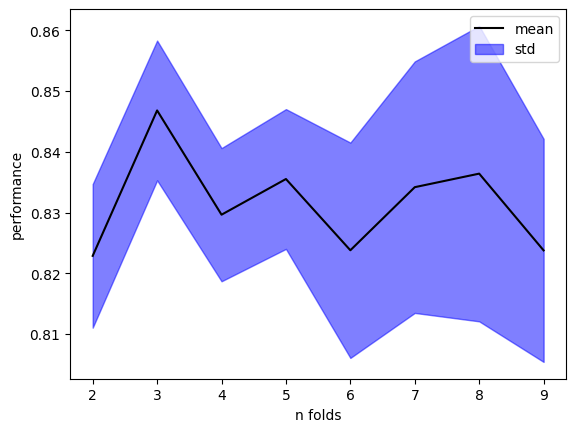

In [ ]:
#@title **GRAFICA** DecisionTreeClassifier
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2, 10)
    for nfolds in nfolds_range:
        # Evaluar el rendimiento con validación cruzada y accuracy_score
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()
    plt.show()

# Crear el clasificador
est = DecisionTreeClassifier(random_state=21)

# Llamar a la función para mostrar la curva de rendimiento
show_curve(est)

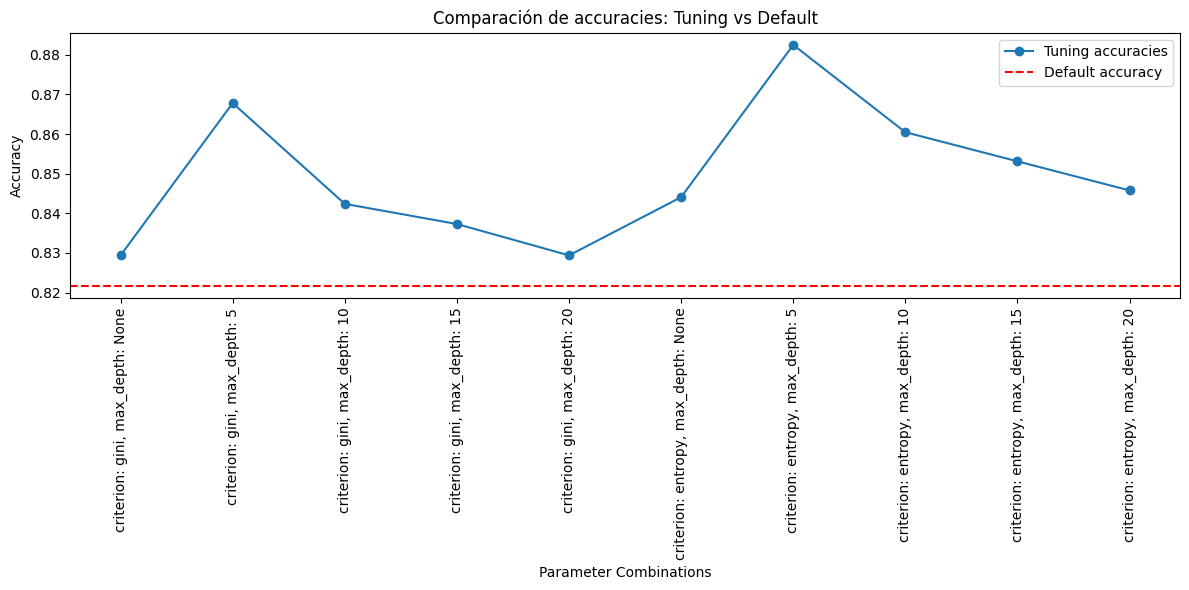

In [ ]:
#@title **GRAFICA COMPARATIVA** DecisionTreeClassifier
mean_accuracies = results_df['mean_test_score']
param_combinations = [f"criterion: {params['criterion']}, max_depth: {params['max_depth']}" for params in results_df['params']]

plt.figure(figsize=(12, 6))
plt.plot(param_combinations, mean_accuracies, marker='o', label='Tuning accuracies')
plt.axhline(y=accuracy_default, color='r', linestyle='--', label='Default accuracy')
plt.xlabel('Parameter Combinations')
plt.ylabel('Accuracy')
plt.title('Comparación de accuracies: Tuning vs Default')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

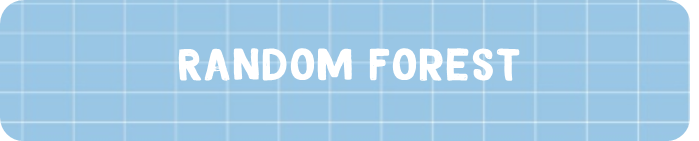

In [ ]:
Image("/content/random forest.png")

In [ ]:
#@title **POR DEFECTO** RandomForestClassifier
np.random.seed(21)
# Separación de las caracteristicas del ground truth
X = df.drop(columns=['Response'])
y = df['Response']

# División del conjunto de datos en entrenamiento (80 %) y prueba (20 %)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=21)

# Creación de un modelo de RandomForestClassifier, entrenamiento y predicción de etiquetas
rf_default = RandomForestClassifier(random_state=21)

# Entrenar y evaluar el modelo por defecto
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Accuracy con RandomForestClassifier por defecto: {accuracy_default}")

Accuracy con RandomForestClassifier por defecto: 0.8826185101580135


In [ ]:
#@title **TUNNING** RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=21), param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
results_df = pd.DataFrame(grid_search.cv_results_)
print("Resultados de la búsqueda de parámetros:")
for index, row in results_df.iterrows():
    print(f"Params: {row['params']}, Mean Accuracy: {row['mean_test_score']:.4f}")
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("\nMejores parámetros encontrados:", best_params)
#evaluo modelo
y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Accuracy con mejores parámetros en el conjunto de prueba:", accuracy_tuned)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Resultados de la búsqueda de parámetros:
Params: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 50}, Mean Accuracy: 0.8678
Params: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}, Mean Accuracy: 0.8678
Params: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 200}, Mean Accuracy: 0.8667
Params: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}, Mean Accuracy: 0.8768
Params: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}, Mean Accuracy: 0.8751
Params: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 200}, Mean Accuracy: 0.8763
Params: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}, Mean Accuracy: 0.8808
Params: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}, Mean Accuracy: 0.8814
Params: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}, Mean Accuracy: 0.8825
Params: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}, Mean Accuracy: 0.

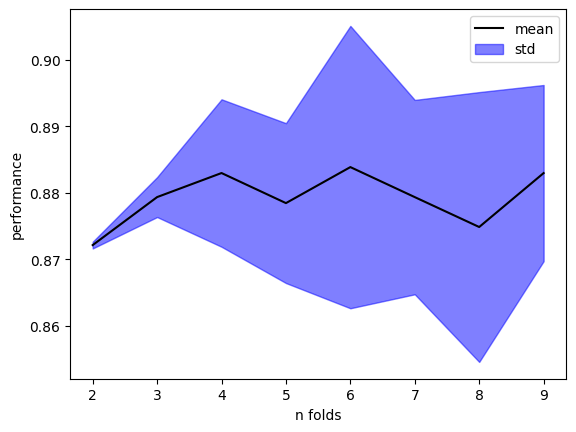

In [ ]:
#@title **GRAFICO:** RandomForestClassifier
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2, 10)
    for nfolds in nfolds_range:
        # Evaluar el rendimiento con validación cruzada y accuracy_score
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()
    plt.show()
# Crear el clasificador
show_curve(RandomForestClassifier())

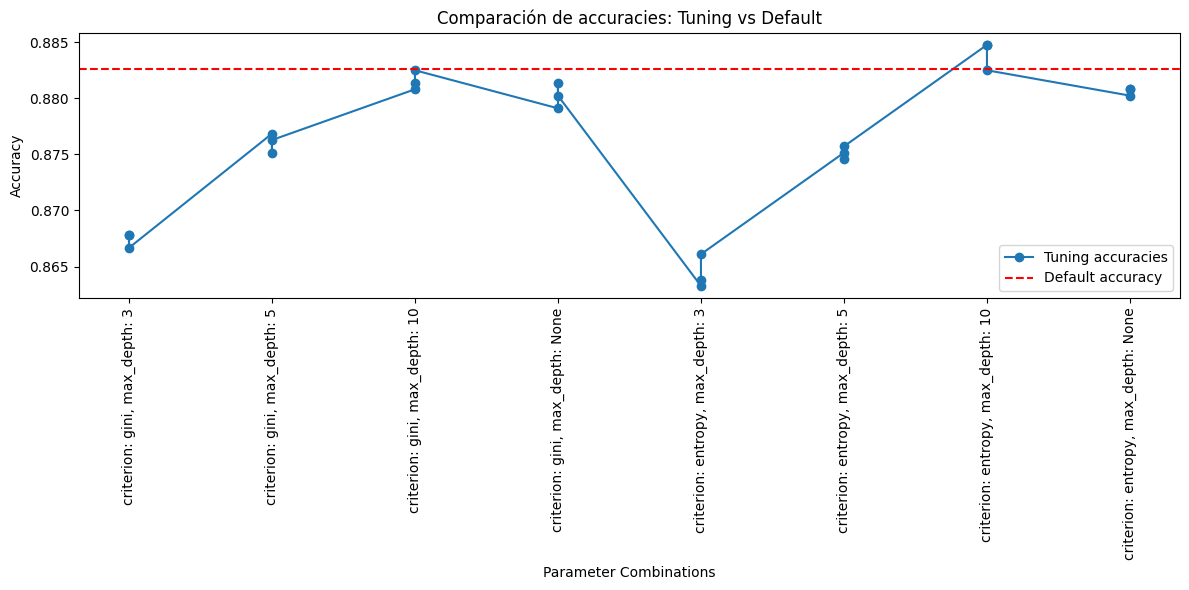

In [ ]:
#@title **GRAFICO COMPARATIVO** RandomForestClassifier
mean_accuracies = results_df['mean_test_score']
param_combinations = [f"criterion: {params['criterion']}, max_depth: {params['max_depth']}" for params in results_df['params']]

plt.figure(figsize=(12, 6))
plt.plot(param_combinations, mean_accuracies, marker='o', label='Tuning accuracies')
plt.axhline(y=accuracy_default, color='r', linestyle='--', label='Default accuracy')
plt.xlabel('Parameter Combinations')
plt.ylabel('Accuracy')
plt.title('Comparación de accuracies: Tuning vs Default')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

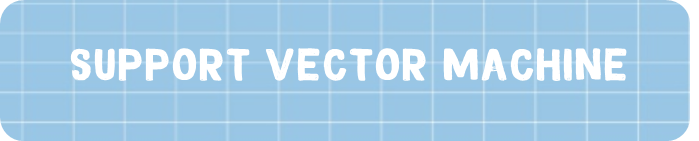

In [ ]:
Image("/content/suppor vector machine.png")

In [ ]:
#@title **POR DEFECTO** SVM
np.random.seed(21)
# Separación de las caracteristicas del ground truth
X = df.drop(columns=['Response'])
y = df['Response']

# División del conjunto de datos en entrenamiento (80 %) y prueba (20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)  # Ya está permutado sin repetir

# Creación de un modelo de SVC, entrenamiento y predicción de etiquetas
SVM_default = SVC(random_state=21)
SVM_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Accuracy con SVM por defecto: {accuracy_default}")

Accuracy con SVM por defecto: 0.8826185101580135


Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


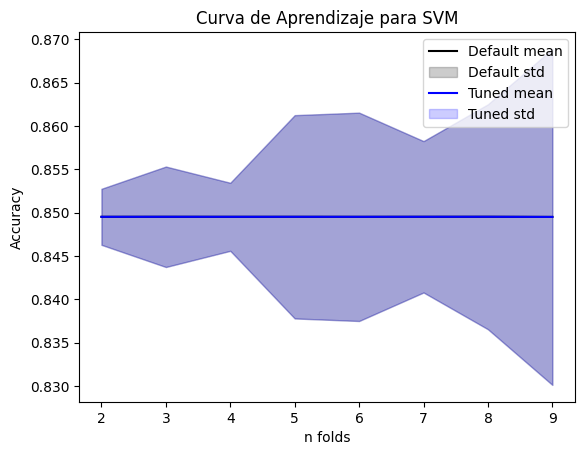

In [ ]:
#@title **TUNNING** SVM
np.random.seed(21)
# Separación de las caracteristicas del ground truth
X = df.drop(columns=['Response'])
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Función para mostrar la curva de aprendizaje
def show_curve(est, title, color):
    means, stds = [], []
    nfolds_range = range(2, 10)
    for nfolds in nfolds_range:
        # Evaluar el rendimiento con validación cruzada y accuracy_score
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True, random_state=21), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label=f"{title} mean", color=color)
    plt.fill_between(nfolds_range, means-stds, means+stds, color=color, alpha=.2, label=f"{title} std")

# Clasificador SVM con parámetros por defecto
svm_default = SVC(random_state=21)
show_curve(svm_default, "Default", "black")

# Tuning de parámetros con GridSearchCV
param_grid = {
    'kernel': ['linear', 'rbf'],

}
grid_search = GridSearchCV(estimator=SVC(random_state=21), param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo tunado
best_model = grid_search.best_estimator_

# Graficar curva de aprendizaje para el mejor modelo tunado
show_curve(best_model, "Tuned", "blue")

# Mostrar la gráfica final
plt.xlabel("n folds")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Curva de Aprendizaje para SVM")
plt.show()

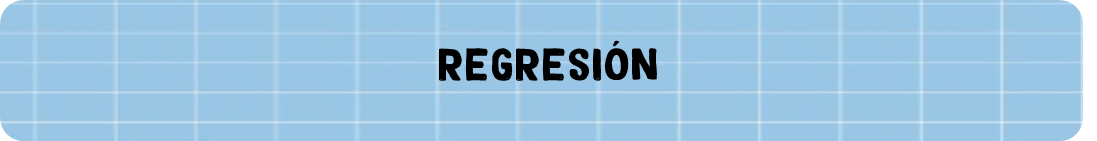

In [ ]:
Image("/content/regresion.png")

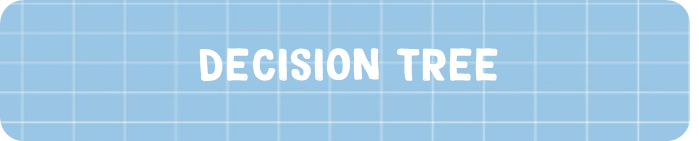

In [ ]:
Image("/content/decision tree.png")

# DecisionTree con parámetros por defecto

In [ ]:
np.random.seed(21)
# Separación de las caracteristicas del ground truth
X = df.drop(columns=['Income'])
y = df['Income']

# División del conjunto de datos en entrenamiento (80 %) y prueba (20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, shuffle=True)

# Creación de un modelo de DecisionTreeRegressor, entrenamiento y predicción de etiquetas
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mae_results = mean_absolute_error(y_test, y_pred)

# Realización de la validación cruzada, junto con el cálculo de la media y la desviación estándar
kf = KFold(n_splits=10, shuffle=True, random_state=21)
cv_results = cross_val_score(regressor, X, y, cv=kf, scoring=make_scorer(mean_absolute_error))
cv_results_mean = np.mean(cv_results)
cv_result_std = np.std(cv_results)

# Imprimir los resultados
print(f"- Resultados en la validación cruzada: {cv_results}")
print(f"- Media de los resultados en la validación cruzada:\n  {cv_results_mean}")
print(f"- Desviación estándar de los resultados de la validación cruzada:\n  {cv_result_std}")
print(f"- Resultado del 'Mean Absolute Error (MAE)':\n  {mae_results}")

- Resultados en la validación cruzada: [ 8427.75225225  9077.85585586  9429.07657658 10246.14932127
  8977.43891403  8325.14932127  8857.89140271  7363.74660633
  9118.88687783 13483.09049774]
- Media de los resultados en la validación cruzada:
  9330.703762586116
- Desviación estándar de los resultados de la validación cruzada:
  1557.002281185944
- Resultado del 'Mean Absolute Error (MAE)':
  9084.634311512415


# DecisionTree con tunning de parámetros

max_depth = 2:
criterion = squared_error: 
  - Resultado del 'Mean Absolute Error (MAE)':
    10297.985633334196
*****************************************************************************************
max_depth = 2:
criterion = friedman_mse: 
  - Resultado del 'Mean Absolute Error (MAE)':
    10297.985633334196
*****************************************************************************************
max_depth = 2:
criterion = absolute_error: 
  - Resultado del 'Mean Absolute Error (MAE)':
    10008.308126410835
*****************************************************************************************
max_depth = 2:
criterion = poisson: 
  - Resultado del 'Mean Absolute Error (MAE)':
    10117.451326517552
*****************************************************************************************
max_depth = 10:
criterion = squared_error: 
  - Resultado del 'Mean Absolute Error (MAE)':
    9260.39649360252
**********************************************************************************

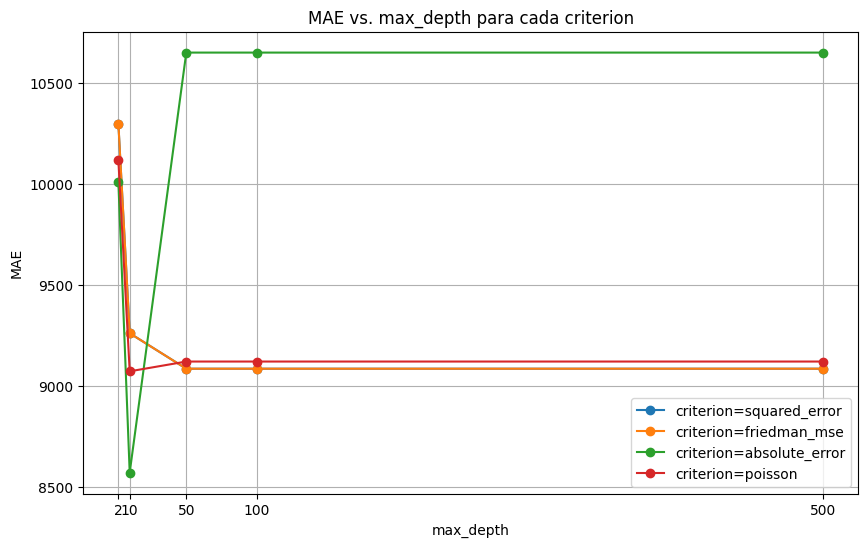

In [ ]:
np.random.seed(21)
# Separación de las caracteristicas del ground truth
X = df.drop(columns=['Income'])
y = df['Income']

# División del conjunto de datos en entrenamiento (80 %) y prueba (20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, shuffle=True)

# Creación de listas para guardar resultados
best_mae = float('inf')
best_params = {}

# Listas para almacenar los resultados de MAE
mae_results = []

# Listas con los diferentes valores para el tunning
max_depths = [2, 10, 50, 100, 500]
criteria = ["squared_error", "friedman_mse", "absolute_error", "poisson"]

# Creación de un modelo de DecisionTreeRegressor, entrenamiento y predicción de etiquetas para cada valor
for md in max_depths:
    for crt in criteria:
      regressor = DecisionTreeRegressor(max_depth = md, criterion = crt, random_state=21)
      regressor.fit(X_train, y_train)
      y_pred = regressor.predict(X_test)
      mae = mean_absolute_error(y_test, y_pred)
      mae_results.append((md, crt, mae))

      # Imprimir resultados para cada valor
      print(f"max_depth = {md}:")
      print(f"criterion = {crt}: ")
      print(f"  - Resultado del 'Mean Absolute Error (MAE)':\n    {mae}")
      print("*****************************************************************************************")

      # Buscar el mejor resultado
      if mae < best_mae:
        best_mae = mae
        best_params = {'max_depth': md, 'criterion': crt}

# Imprimir los mejores resultados
print("\nMejores parámetros encontrados:")
print(best_params)
print(f"Mejor resultado del 'Mean Absolute Error (MAE)': {best_mae}")

# Preparar los datos para graficar
mae_df = pd.DataFrame(mae_results, columns=['max_depth', 'criterion', 'mae'])

# Graficar los resultados de MAE vs. max_depth para cada criterion
plt.figure(figsize=(10, 6))
for crt in criteria:
    plt.plot(mae_df[mae_df['criterion'] == crt]['max_depth'], mae_df[mae_df['criterion'] == crt]['mae'], marker='o', label=f"criterion={crt}")

plt.title('MAE vs. max_depth para cada criterion')
plt.xlabel('max_depth')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.xticks(max_depths)
plt.show()

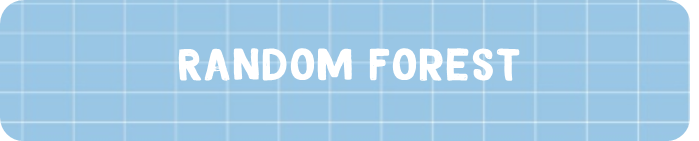

In [ ]:
from IPython.display import Image
Image("/content/random forest.png")

# RandomForest con parámetros por defecto

In [ ]:
np.random.seed(21)
# Separación de las caracteristicas del ground truth
X = df.drop(columns=['Income'])
y = df['Income']

# División del conjunto de datos en entrenamiento (80 %) y prueba (20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, shuffle=True)

# Creación de un modelo de RandomForestRegressor, entrenamiento y predicción de etiquetas
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mae_results = mean_absolute_error(y_test, y_pred)

# Realización de la validación cruzada, junto con el cálculo de la media y la desviación estándar
kf = KFold(n_splits=10, shuffle=True, random_state=21)
cv_results = cross_val_score(regressor, X, y, cv=kf, scoring=make_scorer(mean_absolute_error))
cv_results_mean = np.mean(cv_results)
cv_result_std = np.std(cv_results)

# Imprimir los resultados
print(f"- Resultados en la validación cruzada: {cv_results}")
print(f"- Media de los resultados en la validación cruzada:\n  {cv_results_mean}")
print(f"- Desviación estándar de los resultados de la validación cruzada:\n  {cv_result_std}")
print(f"- Resultado del 'Mean Absolute Error (MAE)':\n  {mae_results}")

- Resultados en la validación cruzada: [ 7312.48288288  8760.84725225  7454.82752252  7814.04565611
  7000.60058824  7456.7018552   8609.78778281  6348.73764706
  7124.84538462 11219.78837104]
- Media de los resultados en la validación cruzada:
  7910.266494272553
- Desviación estándar de los resultados de la validación cruzada:
  1297.237552150375
- Resultado del 'Mean Absolute Error (MAE)':
  8227.97401805869


# RandomForest con tunning de parámetros

n_estimators = 10, max_depth = 2, criterion = squared_error:
  - Resultado del 'Mean Absolute Error (MAE)': 9788.818624422707
*****************************************************************************************
n_estimators = 10, max_depth = 2, criterion = absolute_error:
  - Resultado del 'Mean Absolute Error (MAE)': 9623.06072234763
*****************************************************************************************
n_estimators = 10, max_depth = 2, criterion = friedman_mse:
  - Resultado del 'Mean Absolute Error (MAE)': 9788.818624422707
*****************************************************************************************
n_estimators = 10, max_depth = 2, criterion = poisson:
  - Resultado del 'Mean Absolute Error (MAE)': 9691.609616047625
*****************************************************************************************
n_estimators = 10, max_depth = 10, criterion = squared_error:
  - Resultado del 'Mean Absolute Error (MAE)': 8969.403054838102
****************

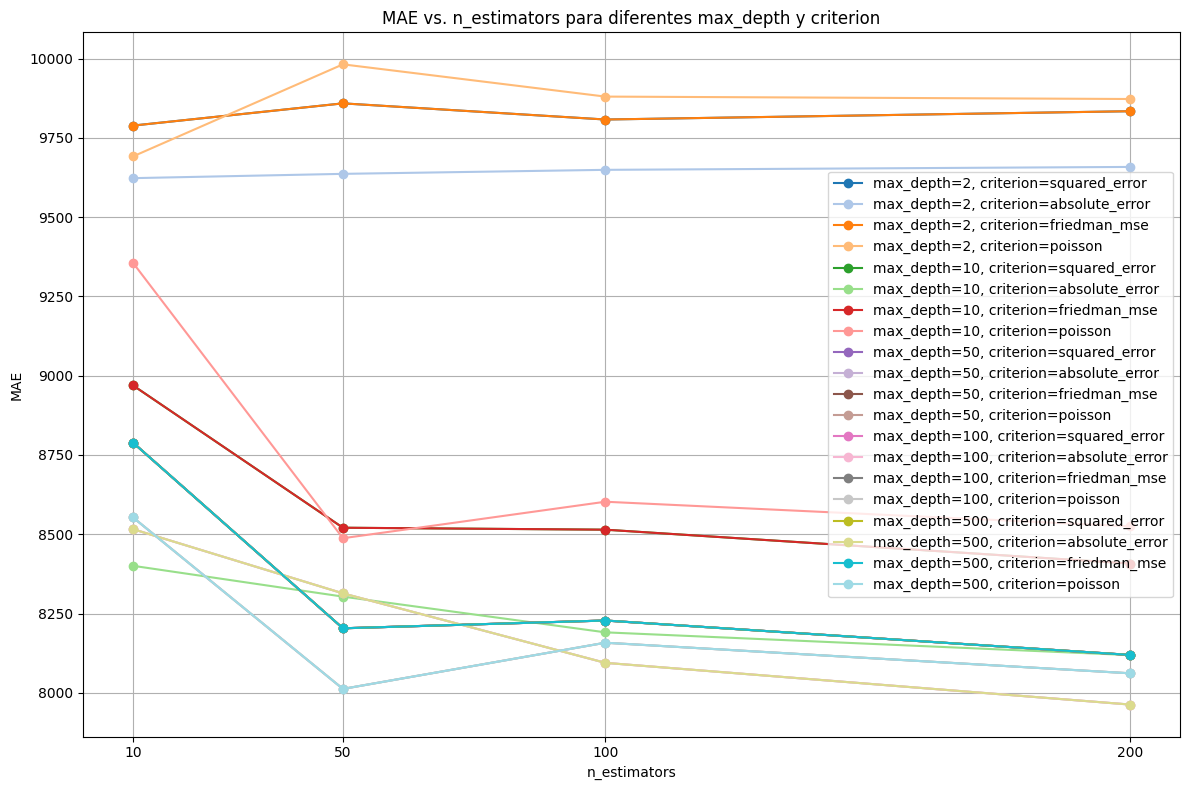

In [ ]:
np.random.seed(21)
# Separación de las caracteristicas del ground truth
X = df.drop(columns=['Income'])
y = df['Income']

# División del conjunto de datos en entrenamiento (80 %) y prueba (20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, shuffle=True)

# Creación de listas para guardar resultados
best_mae = float('inf')
best_params = {}

# Listas para almacenar los resultados de MAE
mae_results = []

# Listas con los diferentes valores para el tunning
n_estimators = [10, 50, 100, 200]
max_depths = [2, 10, 50, 100, 500]
criteria = ["squared_error", "absolute_error", "friedman_mse", "poisson"]

# Creación de un modelo de RandomForestRegressor, entrenamiento y predicción de etiquetas para cada valor
for n_est in n_estimators:
    for md in max_depths:
        for crt in criteria:
          regressor = RandomForestRegressor(n_estimators=n_est, max_depth=md, random_state=21, criterion=crt)
          regressor.fit(X_train, y_train)
          y_pred = regressor.predict(X_test)
          mae = mean_absolute_error(y_test, y_pred)
          mae_results.append((n_est, md, crt, mae))

          # Imprimir resultados para cada combinación de parámetros
          print(f"n_estimators = {n_est}, max_depth = {md}, criterion = {crt}:")
          print(f"  - Resultado del 'Mean Absolute Error (MAE)': {mae}")
          print("*****************************************************************************************")

           # Buscar el mejor resultado
          if mae < best_mae:
            best_mae = mae
            best_params = {'n_estimators': n_est, 'max_depth': md, 'criterion': crt}

# Imprimir los mejores resultados
print("\nMejores parámetros encontrados:")
print(best_params)
print(f"Mejor resultado del 'Mean Absolute Error (MAE)': {best_mae}")

# Preparar los datos para graficar
mae_df = pd.DataFrame(mae_results, columns=['n_estimators', 'max_depth', 'criterion', 'mae'])

# Definir una paleta de colores única para cada combinación de max_depth y criterion
colors = plt.cm.tab20(np.linspace(0, 1, len(max_depths) * len(criteria)))

# Graficar los resultados de MAE vs. n_estimators para diferentes max_depth y criterion
plt.figure(figsize=(12, 8))

color_idx = 0
for md in max_depths:
    for crt in criteria:
        subset = mae_df[(mae_df['max_depth'] == md) & (mae_df['criterion'] == crt)]
        plt.plot(subset['n_estimators'], subset['mae'], marker='o', color=colors[color_idx], label=f"max_depth={md}, criterion={crt}")
        color_idx += 1

plt.title('MAE vs. n_estimators para diferentes max_depth y criterion')
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.xticks(n_estimators, n_estimators)
plt.tight_layout()
plt.show()

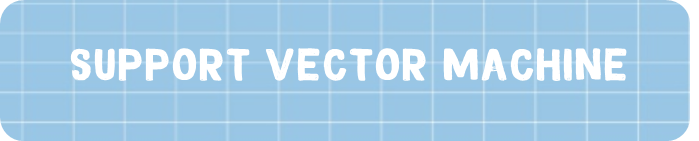

In [ ]:
from IPython.display import Image
Image("/content/suppor vector machine.png")

# SVR con parámetros por defecto

In [ ]:
np.random.seed(21)
# Separación de las caracteristicas del ground truth
X = df.drop(columns=['Income'])
y = df['Income']

# División del conjunto de datos en entrenamiento (80 %) y prueba (20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, shuffle=True)

# Creación de un modelo de SVR, entrenamiento y predicción de etiquetas
regressor = SVR()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mae_results = mean_absolute_error(y_test, y_pred)

# Realización de la validación cruzada, junto con el cálculo de la media y la desviación estándar
kf = KFold(n_splits=10, shuffle=True, random_state=21)
cv_results = cross_val_score(regressor, X, y, cv=kf, scoring=make_scorer(mean_absolute_error))
cv_results_mean = np.mean(cv_results)
cv_result_std = np.std(cv_results)

# Imprimir resultados
print(f"- Resultados en la validación cruzada: {cv_results}")
print(f"- Media de los resultados en la validación cruzada:\n  {cv_results_mean}")
print(f"- Desviación estándar de los resultados de la validación cruzada:\n  {cv_result_std}")
print(f"- Resultado del 'Mean Absolute Error (MAE)':\n  {mae_results}")

- Resultados en la validación cruzada: [17383.06588516 19398.60884784 16913.14957723 17772.0722251
 16333.03427335 17184.7700837  18340.98746289 16940.23682409
 17087.16490163 20340.37260914]
- Media de los resultados en la validación cruzada:
  17769.346269014066
- Desviación estándar de los resultados de la validación cruzada:
  1184.5359742420308
- Resultado del 'Mean Absolute Error (MAE)':
  18400.27869492487


# SVR con tunning de parámetros

kernels = linear:
  - Resultado del 'Mean Absolute Error (MAE)': 10108.420618677004
*****************************************************************************************
kernels = poly:
  - Resultado del 'Mean Absolute Error (MAE)': 15732.149330558264
*****************************************************************************************
kernels = rbf:
  - Resultado del 'Mean Absolute Error (MAE)': 18400.27869492487
*****************************************************************************************

Mejores parámetros encontrados:
{'kernel': 'linear'}
Mejor resultado del 'Mean Absolute Error (MAE)': 10108.420618677004


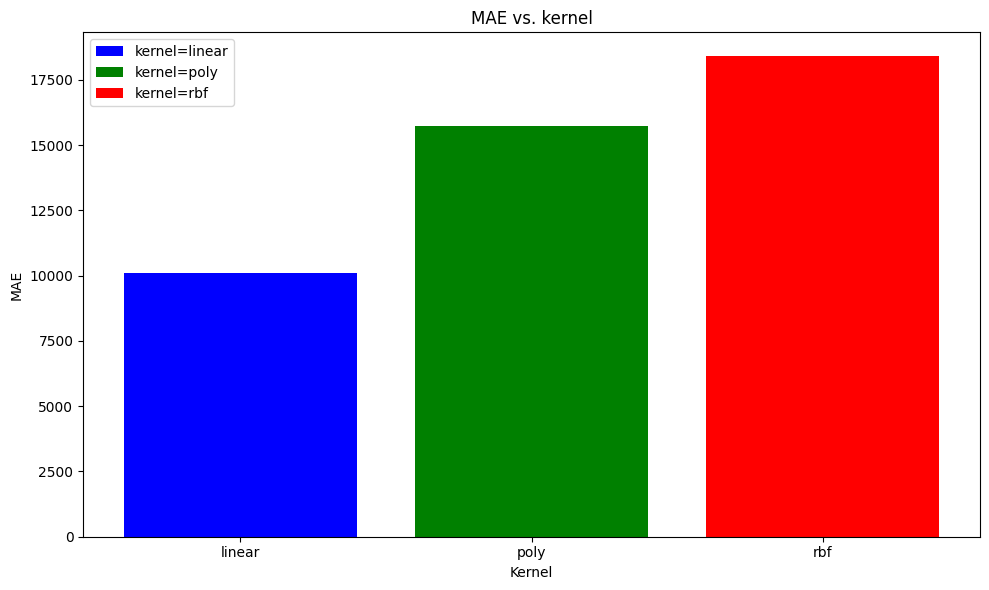

In [ ]:
np.random.seed(21)
# Separación de las caracteristicas del ground truth
X = df.drop(columns=['Income'])
y = df['Income']

# División del conjunto de datos en entrenamiento (80 %) y prueba (20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, shuffle=True)

# Creación de listas para guardar resultados
best_mae = float('inf')
best_params = {}

# Listas para almacenar los resultados de MAE
mae_results = []

# Lista con los diferentes valores para kernel
kernels = ['linear', 'poly', 'rbf']

# Creación de un modelo de SVR, entrenamiento y predicción de etiquetas para cada valor de kernel
for k in kernels:
  regressor = SVR(kernel=k)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  mae_results.append((k, mae))

  # Imprimir resultados para cada kernel
  print(f"kernels = {k}:")
  print(f"  - Resultado del 'Mean Absolute Error (MAE)': {mae}")
  print("*****************************************************************************************")

  # Buscar el mejor resultado
  if mae < best_mae:
    best_mae = mae
    best_params = {'kernel': k}

# Imprimir los mejores resultados
print("\nMejores parámetros encontrados:")
print(best_params)
print(f"Mejor resultado del 'Mean Absolute Error (MAE)': {best_mae}")

# Preparar los datos para graficar
mae_df = pd.DataFrame(mae_results, columns=['kernel', 'mae'])

# Graficar los resultados de MAE vs. kernel
plt.figure(figsize=(10, 6))

# Usar diferentes colores para cada kernel
colors = ['blue', 'green', 'red']

for idx, row in mae_df.iterrows():
    plt.bar(row['kernel'], row['mae'], color=colors[idx], label=f"kernel={row['kernel']}")

plt.title('MAE vs. kernel')
plt.xlabel('Kernel')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()


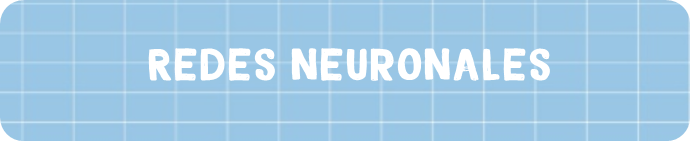

In [ ]:
from IPython.display import Image
Image("/content/redes.png")

# Red neuronal de tres (3) capas

14/14 [==============================] - 0s 2ms/step
epochs = 10:
  - Resultado del 'Mean Absolute Error (MAE)': 44314.75674583142
*****************************************************************************************
14/14 [==============================] - 0s 2ms/step
epochs = 20:
  - Resultado del 'Mean Absolute Error (MAE)': 20751.52851981342
*****************************************************************************************
14/14 [==============================] - 0s 2ms/step
epochs = 30:
  - Resultado del 'Mean Absolute Error (MAE)': 19802.913045155543
*****************************************************************************************

Mejores parámetros encontrados:
{'epochs': 30}
Mejor resultado del 'Mean Absolute Error (MAE)': 19802.913045155543


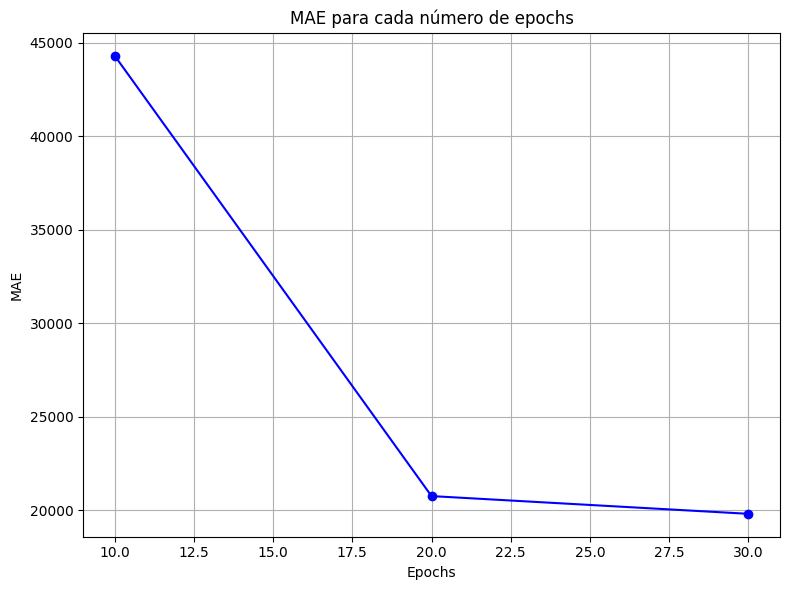

In [ ]:
# Separación de las características del ground truth
X = df.drop(columns=['Income'])
y = df['Income']

# División del conjunto de datos en entrenamiento (80 %) y prueba (20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, shuffle=True)

# Listas para almacenar los resultados de MAE
mae_results = []

# Lista con los diferentes epochs
epochs = [10, 20, 30]

for epch in epochs:
    # Construir el modelo de red neuronal
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation=tf.nn.relu),
        tf.keras.layers.Dense(1)
    ])

    # Compilar, entrenar y realizar predicciones
    model.compile(optimizer='adam', loss='mae', metrics=['mae'])
    model.fit(X_train, y_train, epochs=epch, verbose=0)
    y_pred = model.predict(X_test)

    # Sacar resultados del MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_results.append(mae)

    # Imprimir resultados para cada número de epochs
    print(f"epochs = {epch}:")
    print(f"  - Resultado del 'Mean Absolute Error (MAE)': {mae}")
    print("*****************************************************************************************")

# Buscar e imprimir el mejor resultado
best_mae = min(mae_results)
best_epochs = epochs[np.argmin(mae_results)]
best_params = {'epochs': best_epochs}

print("\nMejores parámetros encontrados:")
print(best_params)
print(f"Mejor resultado del 'Mean Absolute Error (MAE)': {best_mae}")

# Graficar los resultados de MAE para cada número de epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, mae_results, marker='o', color='blue')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('MAE para cada número de epochs')
plt.grid(True)
plt.tight_layout()
plt.show()


# Red neuronal de cinco (5) capas

14/14 [==============================] - 0s 2ms/step
epochs = 10:
  - Resultado del 'Mean Absolute Error (MAE)': 10884.699730177765
*****************************************************************************************
14/14 [==============================] - 0s 2ms/step
epochs = 20:
  - Resultado del 'Mean Absolute Error (MAE)': 10459.213450550225
*****************************************************************************************
14/14 [==============================] - 0s 2ms/step
epochs = 30:
  - Resultado del 'Mean Absolute Error (MAE)': 10414.471055833803
*****************************************************************************************

Mejores parámetros encontrados (MAE):
{'epochs': 30}
Mejor resultado del 'Mean Absolute Error (MAE)': 10414.471055833803


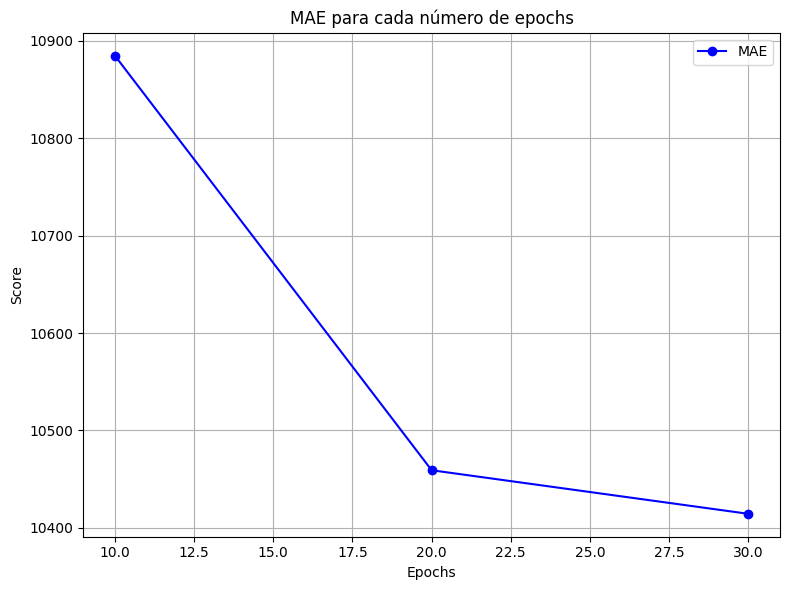

In [ ]:
# Separación de las características del ground truth
X = df.drop(columns=['Income'])
y = df['Income']

# División del conjunto de datos en entrenamiento (80 %) y prueba (20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, shuffle=True)

# Listas para almacenar los resultados de MAE y accuracy
mae_results = []
accuracy_results = []

# Lista con los diferentes epochs
epochs = [10, 20, 30]

for epch in epochs:
    # Construir el modelo de red neuronal
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        tf.keras.layers.Dense(32, activation=tf.nn.relu),
        tf.keras.layers.Dense(1)
    ])

    # Compilar, entrenar y realizar predicciones
    model.compile(optimizer='adam', loss='mae', metrics=['mse'])
    model.fit(X_train, y_train, epochs=epch, verbose=0)
    y_pred = model.predict(X_test)

    # Sacar resultados del MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_results.append(mae)

    # Imprimir resultados para cada número de epochs
    print(f"epochs = {epch}:")
    print(f"  - Resultado del 'Mean Absolute Error (MAE)': {mae}")
    print("*****************************************************************************************")

# Buscar e imprimir el mejor resultado
best_mae = min(mae_results)
best_epochs_mae = epochs[np.argmin(mae_results)]
best_mae_params = {'epochs': best_epochs_mae}

print("\nMejores parámetros encontrados (MAE):")
print(best_mae_params)
print(f"Mejor resultado del 'Mean Absolute Error (MAE)': {best_mae}")

# Graficar los resultados de MAE para cada número de epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, mae_results, marker='o', color='blue', label='MAE')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('MAE para cada número de epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Red neuronal de ocho (8) capas

14/14 [==============================] - 0s 2ms/step
epochs = 10:
  - Resultado del 'Mean Absolute Error (MAE)': 10165.742901735328
*****************************************************************************************
14/14 [==============================] - 0s 2ms/step
epochs = 20:
  - Resultado del 'Mean Absolute Error (MAE)': 9788.3924238149
*****************************************************************************************
14/14 [==============================] - 0s 2ms/step
epochs = 30:
  - Resultado del 'Mean Absolute Error (MAE)': 9526.255563981376
*****************************************************************************************

Mejores parámetros encontrados (MAE):
{'epochs': 30}
Mejor resultado del 'Mean Absolute Error (MAE)': 9526.255563981376


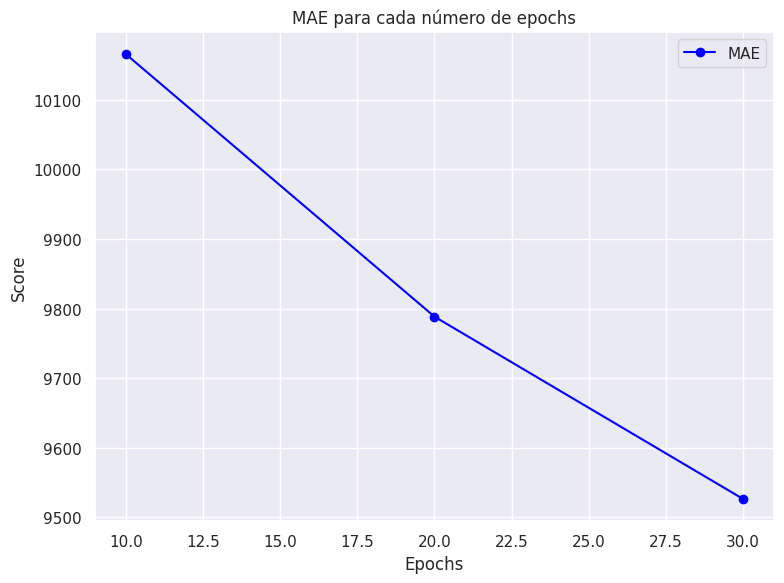

In [ ]:
# Separación de las características del ground truth
X = df.drop(columns=['Income'])
y = df['Income']

# División del conjunto de datos en entrenamiento (80 %) y prueba (20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, shuffle=True)

# Listas para almacenar los resultados de MAE y accuracy
mae_results = []
accuracy_results = []

# Lista con los diferentes epochs
epochs = [10, 20, 30]

for epch in epochs:
    # Construir el modelo de red neuronal
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        tf.keras.layers.Dense(32, activation=tf.nn.relu),
        tf.keras.layers.Dense(16, activation=tf.nn.relu),
        tf.keras.layers.Dense(8, activation=tf.nn.relu),
        tf.keras.layers.Dense(4, activation=tf.nn.relu),
        tf.keras.layers.Dense(1)
    ])

    # Compilar, entrenar y realizar predicciones
    model.compile(optimizer='adam', loss='mae', metrics=['mae'])
    model.fit(X_train, y_train, epochs=epch, verbose=0)
    y_pred = model.predict(X_test)

    # Sacar resultados del MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_results.append(mae)

    # Imprimir resultados para cada número de epochs
    print(f"epochs = {epch}:")
    print(f"  - Resultado del 'Mean Absolute Error (MAE)': {mae}")
    print("*****************************************************************************************")

# Buscar e imprimir el mejor resultado
best_mae = min(mae_results)
best_epochs_mae = epochs[np.argmin(mae_results)]
best_mae_params = {'epochs': best_epochs_mae}

print("\nMejores parámetros encontrados (MAE):")
print(best_mae_params)
print(f"Mejor resultado del 'Mean Absolute Error (MAE)': {best_mae}")

# Graficar los resultados de MAE para cada número de epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, mae_results, marker='o', color='blue', label='MAE')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('MAE para cada número de epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()